# Visualicación

## Carga de datos

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# Paso 1: Cargar los datos de estadísticas por comuna y rango de superficie
data_estadisticos = pd.read_csv('data recuperada/estadisticos_por_comuna_y_rango.csv')

In [3]:
data_estadisticos.columns

Index(['comuna_match', 'Total de Datos', 'Total 100-499 m2', '% 100-499 m2',
       'Total 500-4999 m2', '% 500-4999 m2', 'Total 5000-10000 m2',
       '% 5000-10000 m2', 'Total 10001-100000 m2', '% 10001-100000 m2',
       'Total >100000 m2', '% >100000 m2', 'Mediana costo_m2_uf 100-499 m2',
       'Media costo_m2_uf 100-499 m2', 'Desviación costo_m2_uf 100-499 m2',
       'Mínimo costo_m2_uf 100-499 m2', 'Máximo costo_m2_uf 100-499 m2',
       'IQR costo_m2_uf 100-499 m2', 'Mediana costo_m2_uf 500-4999 m2',
       'Media costo_m2_uf 500-4999 m2', 'Desviación costo_m2_uf 500-4999 m2',
       'Mínimo costo_m2_uf 500-4999 m2', 'Máximo costo_m2_uf 500-4999 m2',
       'IQR costo_m2_uf 500-4999 m2', 'Mediana costo_m2_uf 5000-10000 m2',
       'Media costo_m2_uf 5000-10000 m2',
       'Desviación costo_m2_uf 5000-10000 m2',
       'Mínimo costo_m2_uf 5000-10000 m2', 'Máximo costo_m2_uf 5000-10000 m2',
       'IQR costo_m2_uf 5000-10000 m2', 'Mediana costo_m2_uf 10001-100000 m2',
       'Me

In [4]:
import pandas as pd


# Cargar los archivos de clustering
Kmeans_SinPCA_1 = pd.read_csv("data recuperada/comunas cluster/comunas_SinPCA_1.csv")
Jerarq_SinPCA_2 = pd.read_csv("data recuperada/comunas cluster/comunas_jerarquico_SinPCA_2_7Clústers.csv")
Divisive_SinPCA = pd.read_csv('data recuperada/comunas cluster/comunas_divisive.csv', index_col=0)

# Realizar los merges
Kmeans_data = data_estadisticos.merge(Kmeans_SinPCA_1, on='comuna_match', how='left', suffixes=('', '_Kmeans'))
Jerarq2_data = data_estadisticos.merge(Jerarq_SinPCA_2, on='comuna_match', how='left', suffixes=('', '_Jerarq2'))
Divisive_data = data_estadisticos.merge(Divisive_SinPCA, on='comuna_match', how='left', suffixes=('', '_Divisive'))

# Verificar las primeras filas de cada dataset
print("Kmeans_data:\n", Kmeans_data.head())
print("Jerarq2_data:\n", Jerarq2_data.head())
print("Divisive_data:\n", Divisive_data.head())


Kmeans_data:
       comuna_match  Total de Datos  Total 100-499 m2  % 100-499 m2  \
0        ALGARROBO            1602             188.0     11.735331   
1            ALHUE              32               1.0      3.125000   
2      ALTO BIOBIO              11               2.0     18.181818   
3  ALTO DEL CARMEN              22               1.0      4.545455   
4    ALTO HOSPICIO             249              56.0     22.489960   

   Total 500-4999 m2  % 500-4999 m2  Total 5000-10000 m2  % 5000-10000 m2  \
0              350.0      21.847690                754.0        47.066167   
1                4.0      12.500000                 10.0        31.250000   
2                2.0      18.181818                  5.0        45.454545   
3                6.0      27.272727                  8.0        36.363636   
4               39.0      15.662651                110.0        44.176707   

   Total 10001-100000 m2  % 10001-100000 m2  ...  \
0                  271.0          16.916355  ...  

In [14]:
import pandas as pd

# Cargar los archivos de clustering con totales por semestre
kmeans_prop_datos = pd.read_csv("data recuperada/comunas cluster/kmeans_semestres_%datos.csv")
divisive_prop_datos = pd.read_csv("data recuperada/comunas cluster/divisive_semestres_%datos.csv")
jerarquico_prop_datos = pd.read_csv("data recuperada/comunas cluster/jerarquico_semestres_%datos.csv")
kmeans_num_datos = pd.read_csv("data recuperada/comunas cluster/kmeans_semestres_numdatos.csv")
jerarquico_num_datos = pd.read_csv("data recuperada/comunas cluster/jerarquico_semestres_numdatos.csv")
divisive_num_datos = pd.read_csv("data recuperada/comunas cluster/divisive_semestres_numdatos.csv")


# Agregar columna 'Total de Datos' como la suma de todos los semestres
for data in [kmeans_prop_datos, divisive_prop_datos, jerarquico_prop_datos, kmeans_num_datos, jerarquico_num_datos ,divisive_num_datos]:
    # Identificar columnas que contienen "Total de Datos" en su nombre
    columnas_totales = [col for col in data.columns if "Total de Datos" in col]
    # Crear la nueva columna 'Total de Datos' como suma de las columnas por semestre
    data['Total de Datos'] = data[columnas_totales].sum(axis=1)

    # Mostrar solo las columnas de 'Total de Datos' para verificar
    print(data[['comuna_match'] + columnas_totales + ['Total de Datos']].head())


      comuna_match  Total de Datos_2021S1  Total de Datos_2021S2  \
0        ALGARROBO                  142.0                  149.0   
1            ALHUE                    3.0                    2.0   
2      ALTO BIOBIO                    3.0                    3.0   
3  ALTO DEL CARMEN                    1.0                    0.0   
4    ALTO HOSPICIO                   26.0                   41.0   

   Total de Datos_2022S1  Total de Datos_2022S2  Total de Datos_2023S1  \
0                  167.0                  233.0                  244.0   
1                    6.0                    9.0                    2.0   
2                    3.0                    2.0                    0.0   
3                    1.0                    6.0                    4.0   
4                   23.0                   49.0                   41.0   

   Total de Datos_2023S2  Total de Datos_2024S1  Total de Datos_2024S2  \
0                  248.0                  335.0                   84.0  

In [7]:
import geopandas as gpd
import re
import unidecode  # Necesario para manejar tildes y diéresis: pip install unidecode

# Cargar el shapefile de comunas de Chile desde el archivo original
chile_map = gpd.read_file("Mapas/comunas.shp")

# Función de normalización para nombres de comunas
def normalizar_nombre(nombre):
    # Quitar tildes y diéresis, y convertir a mayúsculas
    nombre = unidecode.unidecode(nombre).upper()
    # Reemplazar caracteres especiales, incluyendo el caso de O'HIGGINS y espacios extra
    nombre = re.sub(r"[^\w\s]", "", nombre)  # Eliminar cualquier carácter no alfanumérico excepto espacios
    nombre = re.sub(r"\s+", " ", nombre).strip()  # Quitar espacios extra
    return nombre

# Crear una nueva columna 'Comuna_normalizada' en chile_map usando la función de normalización
chile_map['Comuna_normalizada'] = chile_map['Comuna'].apply(normalizar_nombre)

# Proyectar chile_map a un sistema de coordenadas adecuado para calcular correctamente los centroides
chile_map = chile_map.to_crs("EPSG:32719")  # EPSG:32719 es UTM Zona 19S, adecuado para Chile
chile_map['centroid'] = chile_map.geometry.centroid  # Calcular los centroides en el sistema proyectado

# Volver al sistema de coordenadas geográficas (WGS84) para obtener los centroides en latitud y longitud
chile_map = chile_map.to_crs("EPSG:4326")
chile_map['centroid'] = chile_map['centroid'].to_crs("EPSG:4326")  # Transformar los centroides también




In [33]:
# Diccionario de modelos con datos de clustering
archivos_clustering = {
    "Kmeans_SinPCA_1": Kmeans_data,
    "Jerarq_SinPCA_2": Jerarq2_data,
    "Divisive_SinPCA": Divisive_data
}

# Verificar comunas sin cluster asignado en cada archivo
for nombre_modelo, data_modelo in archivos_clustering.items():
    # Unir chile_map con el dataset de clustering actual usando 'Comuna_normalizada' para el merge
    chile_mapa_modelo = chile_map.merge(data_modelo[['comuna_match', 'cluster']], left_on='Comuna_normalizada', right_on='comuna_match', how='left')
    
    # Verificar las comunas sin cluster asignado después del merge
    sin_cluster = chile_mapa_modelo[chile_mapa_modelo['cluster'].isna()]
    print(f"Comunas sin cluster asignado en {nombre_modelo}:")
    print(sin_cluster[['Comuna', 'Comuna_normalizada', 'cluster']])


Comunas sin cluster asignado en Kmeans_SinPCA_1:
                Comuna Comuna_normalizada  cluster
0            Marchigüe          MARCHIGUE      NaN
56   Zona sin demarcar  ZONA SIN DEMARCAR      NaN
102       San Gregorio       SAN GREGORIO      NaN
138          Río Verde          RIO VERDE      NaN
235     Isla de Pascua     ISLA DE PASCUA      NaN
241       Sierra Gorda       SIERRA GORDA      NaN
249             Calera             CALERA      NaN
265            Ranquil            RANQUIL      NaN
Comunas sin cluster asignado en Jerarq_SinPCA_2:
                Comuna Comuna_normalizada  cluster
0            Marchigüe          MARCHIGUE      NaN
56   Zona sin demarcar  ZONA SIN DEMARCAR      NaN
102       San Gregorio       SAN GREGORIO      NaN
138          Río Verde          RIO VERDE      NaN
235     Isla de Pascua     ISLA DE PASCUA      NaN
241       Sierra Gorda       SIERRA GORDA      NaN
249             Calera             CALERA      NaN
265            Ranquil            R

In [15]:
# Diccionario de modelos con las nuevas datas que ya contienen los clusters
archivos_clustering_nuevos = {
    "Kmeans_prop_datos": kmeans_prop_datos,
    "Jerarquico_prop_datos": jerarquico_prop_datos,
    "Divisive_prop_datos": divisive_prop_datos,
    "Kmeans_num_datos": kmeans_num_datos,
    "Divisive_num_datos": divisive_num_datos,
    "Jerarquico_num_datos": jerarquico_num_datos
}

# Verificar comunas sin cluster asignado en cada uno de los archivos nuevos
for nombre_modelo, data_modelo in archivos_clustering_nuevos.items():
    # Verificar directamente en la data si hay comunas sin cluster asignado
    sin_cluster = data_modelo[data_modelo['cluster'].isna()]
    print(f"Comunas sin cluster asignado en {nombre_modelo}:")
    print(sin_cluster[['comuna_match', 'cluster']])


Comunas sin cluster asignado en Kmeans_prop_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []
Comunas sin cluster asignado en Jerarquico_prop_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []
Comunas sin cluster asignado en Divisive_prop_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []
Comunas sin cluster asignado en Kmeans_num_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []
Comunas sin cluster asignado en Divisive_num_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []
Comunas sin cluster asignado en Jerarquico_num_datos:
Empty DataFrame
Columns: [comuna_match, cluster]
Index: []


In [16]:
import folium
from folium.plugins import FeatureGroupSubGroup
from matplotlib.colors import ListedColormap

# Colores para los clusters
colores = ListedColormap(['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2'])

# Definir los límites del radio de los círculos
radio_min = 10   # Tamaño mínimo del radio
radio_max = 35   # Tamaño máximo del radio

# Comunas de interés
comunas_interes = ["Machalí", "Pichilemu", "Algarrobo", "Puerto Varas"]

# Diccionario único que incluye los modelos de clustering originales y nuevos
todos_los_modelos = {
    "Kmeans_SinPCA_1": Kmeans_data,
    "Jerarq_SinPCA_2": Jerarq2_data,
    "Divisive_SinPCA": Divisive_data,
    "Kmeans_prop_datos": kmeans_prop_datos,
    "Jerarquico_prop_datos": jerarquico_prop_datos,
    "Divisive_prop_datos": divisive_prop_datos,
    "Kmeans_num_datos": kmeans_num_datos,
    "Divisive_num_datos": divisive_num_datos,
    "Jerarquico_num_datos": jerarquico_num_datos
}

# Función para crear mapas
def crear_mapa(data, nombre_modelo):
    # Unir chile_map con el dataset de clustering actual
    chile_mapa_modelo = chile_map.merge(data[['comuna_match', 'cluster', 'Total de Datos']], left_on='Comuna_normalizada', right_on='comuna_match', how='left')
    
    # Normalizar 'Total de Datos' para calcular el radio proporcional
    total_min = chile_mapa_modelo['Total de Datos'].min()
    total_max = chile_mapa_modelo['Total de Datos'].max()
    chile_mapa_modelo['radio'] = chile_mapa_modelo['Total de Datos'].apply(
        lambda x: radio_min + (radio_max - radio_min) * (x - total_min) / (total_max - total_min) if pd.notna(x) else radio_min
    )

    # Crear un mapa centrado en Chile
    centro_chile = [-35.6751, -71.5430]
    mapa = folium.Map(location=centro_chile, zoom_start=6, tiles="OpenStreetMap")

    # Crear grupos de capas para cada cluster
    grupos_cluster = {}
    for i in range(len(colores.colors)):
        grupo = folium.FeatureGroup(name=f"Cluster {i}")
        mapa.add_child(grupo)
        grupos_cluster[i] = FeatureGroupSubGroup(grupo, f"Cluster {i}")
        mapa.add_child(grupos_cluster[i])

    # Añadir los puntos de colores al mapa con radios proporcionales
    for _, row in chile_mapa_modelo.iterrows():
        # Obtener el centroide
        lat = row['centroid'].y
        lon = row['centroid'].x
        cluster = row['cluster']
        radio = row['radio']  # Radio proporcional a la oferta
        
        # Definir el color y el grupo según el cluster
        if pd.notna(cluster):
            cluster_int = int(cluster)
            color = colores.colors[cluster_int % len(colores.colors)]
            grupo_actual = grupos_cluster[cluster_int]
        else:
            color = '#808080'  # Color gris si no hay cluster asignado
            grupo_actual = mapa  # Si no hay cluster, añadirlo directamente al mapa
        
        # Añadir un marcador para cada comuna con radio variable
        folium.CircleMarker(
            location=[lat, lon],
            radius=radio,
            popup=f"Comuna: {row['Comuna']}<br>Cluster: {cluster_int if pd.notna(cluster) else 'Sin asignar'}<br>Total de Datos: {row['Total de Datos']}",
            color="black",
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            weight=0.5
        ).add_to(grupo_actual)

    # Crear una leyenda personalizada
    legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 200px; height: 300px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.85;
    padding: 10px;">
    &nbsp; <b>Clusters</b> <br>
    """
    for i, color in enumerate(colores.colors):
        legend_html += f'&nbsp; Cluster {i} &nbsp; <i class="fa fa-circle" style="color:{color}"></i><br>'
    
    # Añadir información sobre las comunas de interés en la leyenda para el modelo actual
    legend_html += "<br>&nbsp; <b>Comunas de Interés</b> <br>"
    for comuna in comunas_interes:
        # Encontrar el cluster de la comuna en el modelo actual
        cluster_comuna = chile_mapa_modelo.loc[chile_mapa_modelo['Comuna'] == comuna, 'cluster']
        cluster_valor = int(cluster_comuna.values[0]) if not cluster_comuna.isna().all() else 'Sin asignar'
        legend_html += f"&nbsp; {comuna}: Cluster {cluster_valor}<br>"

    legend_html += "</div>"

    # Agregar la leyenda al mapa
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Añadir control de capas para habilitar el filtro de clusters
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa con un nombre que indique el modelo
    mapa.save(f"mapas_clusters/mapa_proporcional_{nombre_modelo}_con_comunas_interes_y_filtro.html")


# Crear mapas para todos los modelos
for nombre_modelo, data_modelo in todos_los_modelos.items():
    crear_mapa(data_modelo, nombre_modelo)


## Anteriores

In [41]:
import folium
from matplotlib.colors import ListedColormap

# Colores para los clusters
colores = ListedColormap(['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2'])

# Crear mapas
for nombre_modelo, data_modelo in archivos_clustering.items():
    # Unir chile_map con el dataset de clustering actual
    chile_mapa_modelo = chile_map.merge(data_modelo[['comuna_match', 'cluster', 'Total de Datos']], left_on='Comuna_normalizada', right_on='comuna_match', how='left')
    
    # Definir un radio ajustado para los círculos
    radio_fijo = 10  # Ajusta el radio según tu preferencia

    # Crear un mapa centrado en Chile
    centro_chile = [-35.6751, -71.5430]
    mapa = folium.Map(location=centro_chile, zoom_start=6, tiles="OpenStreetMap")

    # Añadir los puntos de colores al mapa
    for _, row in chile_mapa_modelo.iterrows():
        # Obtener el centroide
        lat = row['centroid'].y
        lon = row['centroid'].x
        cluster = row['cluster']
        
        # Definir el color según el cluster
        if pd.notna(cluster):
            color = colores.colors[int(cluster) % len(colores.colors)]
        else:
            color = '#808080'  # Color gris si no hay cluster asignado
        
        # Añadir un marcador para cada comuna con radio ajustado
        folium.CircleMarker(
            location=[lat, lon],
            radius=radio_fijo,
            popup=f"Comuna: {row['Comuna']}<br>Cluster: {int(cluster) if pd.notna(cluster) else 'Sin asignar'}<br>Total de Datos: {row['Total de Datos']}",
            color="black",
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            weight=0.5
        ).add_to(mapa)

    # Crear una leyenda personalizada
    from branca.element import Template, MacroElement

    # Leyenda ajustada para mostrar Clusters de 0 a 6
    legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 160px; height: 180px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.85; padding: 10px;">
    <b>Clusters</b> <br>
    """
    for i, color in enumerate(colores.colors):
        legend_html += f'&nbsp; Cluster {i} &nbsp; <i class="fa fa-circle" style="color:{color}"></i><br>'
    legend_html += "</div>"

    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Guardar el mapa en una carpeta específica llamada "mapas_clusters"
    mapa.save(f"mapas_clusters/mapa_{nombre_modelo}.html")



In [59]:
import folium
from folium.plugins import FeatureGroupSubGroup
from matplotlib.colors import ListedColormap

# Colores para los clusters
colores = ListedColormap(['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2'])

# Definir los límites del radio de los círculos
radio_min = 10   # Tamaño mínimo del radio
radio_max = 40   # Tamaño máximo del radio

# Comunas de interés
comunas_interes = ["Machalí", "Pichilemu", "Algarrobo", "Puerto Varas"]

# Crear mapas
for nombre_modelo, data_modelo in archivos_clustering.items():
    # Unir chile_map con el dataset de clustering actual
    chile_mapa_modelo = chile_map.merge(data_modelo[['comuna_match', 'cluster', 'Total de Datos']], left_on='Comuna_normalizada', right_on='comuna_match', how='left')
    
    # Normalizar 'Total de Datos' para calcular el radio proporcional
    total_min = chile_mapa_modelo['Total de Datos'].min()
    total_max = chile_mapa_modelo['Total de Datos'].max()
    chile_mapa_modelo['radio'] = chile_mapa_modelo['Total de Datos'].apply(
        lambda x: radio_min + (radio_max - radio_min) * (x - total_min) / (total_max - total_min) if pd.notna(x) else radio_min
    )

    # Crear un mapa centrado en Chile
    centro_chile = [-35.6751, -71.5430]
    mapa = folium.Map(location=centro_chile, zoom_start=6, tiles="OpenStreetMap")

    # Crear grupos de capas para cada cluster
    grupos_cluster = {}
    for i in range(len(colores.colors)):
        grupo = folium.FeatureGroup(name=f"Cluster {i}")
        mapa.add_child(grupo)
        grupos_cluster[i] = FeatureGroupSubGroup(grupo, f"Cluster {i}")
        mapa.add_child(grupos_cluster[i])

    # Añadir los puntos de colores al mapa con radios proporcionales
    for _, row in chile_mapa_modelo.iterrows():
        # Obtener el centroide
        lat = row['centroid'].y
        lon = row['centroid'].x
        cluster = row['cluster']
        radio = row['radio']  # Radio proporcional a la oferta
        
        # Definir el color y el grupo según el cluster
        if pd.notna(cluster):
            cluster_int = int(cluster)
            color = colores.colors[cluster_int % len(colores.colors)]
            grupo_actual = grupos_cluster[cluster_int]
        else:
            color = '#808080'  # Color gris si no hay cluster asignado
            grupo_actual = mapa  # Si no hay cluster, añadirlo directamente al mapa
        
        # Añadir un marcador para cada comuna con radio variable
        folium.CircleMarker(
            location=[lat, lon],
            radius=radio,
            popup=f"Comuna: {row['Comuna']}<br>Cluster: {cluster_int if pd.notna(cluster) else 'Sin asignar'}<br>Total de Datos: {row['Total de Datos']}",
            color="black",
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            weight=0.5
        ).add_to(grupo_actual)

    # Crear una leyenda personalizada
    legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 200px; height: 300px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.85;
    padding: 10px;">
    &nbsp; <b>Clusters</b> <br>
    """
    for i, color in enumerate(colores.colors):
        legend_html += f'&nbsp; Cluster {i} &nbsp; <i class="fa fa-circle" style="color:{color}"></i><br>'
    
    # Añadir información sobre las comunas de interés en la leyenda para el modelo actual
    legend_html += "<br>&nbsp; <b>Comunas de Interés</b> <br>"
    for comuna in comunas_interes:
        # Encontrar el cluster de la comuna en el modelo actual
        cluster_comuna = chile_mapa_modelo.loc[chile_mapa_modelo['Comuna'] == comuna, 'cluster']
        cluster_valor = int(cluster_comuna.values[0]) if not cluster_comuna.isna().all() else 'Sin asignar'
        legend_html += f"&nbsp; {comuna}: Cluster {cluster_valor}<br>"

    legend_html += "</div>"

    # Agregar la leyenda al mapa
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Añadir control de capas para habilitar el filtro de clusters
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en una carpeta específica con un nombre diferente
    mapa.save(f"mapas_clusters/mapa_proporcional_{nombre_modelo}_con_comunas_interes_y_filtro.html")


In [56]:
# Comunas de interés
comunas_interes = ["Machalí", "Pichilemu", "Algarrobo", "Puerto Varas"]

# Mostrar los nombres exactos de las comunas en chile_mapa_modelo para ver cómo están almacenadas
for comuna in comunas_interes:
    resultado = chile_mapa_modelo[chile_mapa_modelo['Comuna'].str.contains(comuna, case=False, na=False)]
    print(f"Resultados para '{comuna}':")
    print(resultado[['Comuna', 'Comuna_normalizada', 'cluster']])
    print("\n" + "-"*50 + "\n")


Resultados para 'Machalí':
      Comuna Comuna_normalizada  cluster
306  Machalí            MACHALI      0.0

--------------------------------------------------

Resultados para 'Pichilemu':
        Comuna Comuna_normalizada  cluster
186  Pichilemu          PICHILEMU      2.0

--------------------------------------------------

Resultados para 'Algarrobo':
        Comuna Comuna_normalizada  cluster
199  Algarrobo          ALGARROBO      2.0

--------------------------------------------------

Resultados para 'Puerto Varas':
           Comuna Comuna_normalizada  cluster
313  Puerto Varas       PUERTO VARAS      1.0

--------------------------------------------------



# Mapas Linares, Paine, Osorno, Casablanca, Molina, Curicó


In [1]:
import pandas as pd
data_2021 = pd.read_csv("data recuperada/data_sin_outliers.csv")

In [2]:
data_linares = data_2021[(data_2021['comuna_match'] == 'LINARES') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [2]:
data_paine = data_2021[(data_2021['comuna_match'] == 'PAINE') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [4]:
data_osorno = data_2021[(data_2021['comuna_match'] == 'OSORNO') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [5]:
data_casablanca = data_2021[(data_2021['comuna_match'] == 'CASABLANCA') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [6]:
data_molina = data_2021[(data_2021['comuna_match'] == 'MOLINA') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [7]:
data_curico = data_2021[(data_2021['comuna_match'] == 'CURICO') & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')) & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [8]:
#Mapas/Mapas comunas
data_linares.columns

Index(['id', 'concat', 'publicada', 'created_at', 'data_source', 'tipo',
       'sub_tipo', 'precio_clp', 'precio_uf', 'region', 'comuna', 'latitude',
       'longitude', 'total_o_terreno', 'util_o_construido', 'active',
       'fecha_finalizacion', 'precio_clp_inicial', 'precio_uf_inicial',
       'descripcion_sin_saltos', 'direccion_sin_saltos', 'descripcion_2',
       'region_norm', 'comuna_norm', 'comuna_match', 'superficies_dict',
       'mayor_superficie', 'diferencia_pct', 'diferencia_abs', 'semestre',
       'descripcion_normalizada', 'duplicados_con', 'duplicado',
       'valor_uf_inicial', 'valor_uf', 'margen_uf_inicial', 'margen_uf',
       'dif_pct_abs', 'UF_Ha', 'total_o_terreno_ha', 'UF_Ha_inicial',
       'superficie_Ha', 'valores_terreno', 'costo_m2_uf', 'rango_superficie',
       'is_outlier'],
      dtype='object')

In [9]:
# Lista de datasets y nombres para iterar
datasets = {
    'Linares': data_linares,
    'Paine': data_paine,
    'Osorno': data_osorno,
    'Casablanca': data_casablanca,
    'Molina': data_molina,
    'Curico': data_curico
}

# Contar cuántos datos tienen latitude y longitude distintos de 0
for nombre, data in datasets.items():
    total_ofertas = data.shape[0]
    count_valid = data[(data['latitude'] != 0) & (data['longitude'] != 0)].shape[0]
    print(f"{nombre}: {count_valid} de {total_ofertas} ofertas tienen coordenadas válidas")

Linares: 60 de 73 ofertas tienen coordenadas válidas
Paine: 134 de 145 ofertas tienen coordenadas válidas
Osorno: 124 de 149 ofertas tienen coordenadas válidas
Casablanca: 102 de 114 ofertas tienen coordenadas válidas
Molina: 50 de 51 ofertas tienen coordenadas válidas
Curico: 53 de 65 ofertas tienen coordenadas válidas


In [10]:
import folium
import pandas as pd
import numpy as np
import os

# Colores para cada tipo de terreno
colores = {
    '500-4999 m2': 'blue',
    '10001-100000 m2': 'green'
}

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa por cada data
def crear_mapa(data, nombre_comuna):
    # Filtrar solo las filas con coordenadas válidas para calcular el centro
    coordenadas_validas = data[(data['latitude'] != 0) & (data['longitude'] != 0)]
    
    # Filtrar outliers de las coordenadas
    coordenadas_filtradas = filtrar_outliers(coordenadas_validas, 'latitude', 'longitude')

    # Calcular el centro de la comuna usando el promedio de latitud y longitud de las coordenadas filtradas
    centro_lat = coordenadas_filtradas['latitude'].mean()
    centro_lon = coordenadas_filtradas['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Iterar sobre cada fila en las coordenadas válidas y filtradas
    for _, row in coordenadas_filtradas.iterrows():
        # Asignar color según la categoría en 'rango_superficie'
        color = colores.get(row['rango_superficie'], 'gray')  # Usar gris por defecto si el valor no está en el diccionario

        # Añadir el marcador en el mapa
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=10,  # Ajusta el tamaño según prefieras
            color="black",
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            weight=0.3,  # Grosor de la línea ajustado
            popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {row['rango_superficie']}<br>Precio UF: {row['precio_uf']}<br>Superficie: {row['total_o_terreno']} m²"
        ).add_to(mapa)

    # Crear una leyenda personalizada
    legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 180px; height: 100px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.85; padding: 10px;">
    <b>Rangos de Superficie</b><br>
    <i class="fa fa-circle" style="color:blue"></i> 500-4999 m2<br>
    <i class="fa fa-circle" style="color:green"></i> 10001-100000 m2<br>
    </div>
    """
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}.html")
    print(f"Mapa de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}.html'.")

# Crear un diccionario con los datasets
datasets = {
    'Linares': data_linares,
    'Paine': data_paine,
    'Osorno': data_osorno,
    'Casablanca': data_casablanca,
    'Molina': data_molina,
    'Curico': data_curico
}

# Generar los mapas
for nombre, data in datasets.items():
    crear_mapa(data, nombre)



Mapa de Linares guardado en 'Mapas/Mapas comunas/mapa_Linares.html'.
Mapa de Paine guardado en 'Mapas/Mapas comunas/mapa_Paine.html'.
Mapa de Osorno guardado en 'Mapas/Mapas comunas/mapa_Osorno.html'.
Mapa de Casablanca guardado en 'Mapas/Mapas comunas/mapa_Casablanca.html'.
Mapa de Molina guardado en 'Mapas/Mapas comunas/mapa_Molina.html'.
Mapa de Curico guardado en 'Mapas/Mapas comunas/mapa_Curico.html'.


In [11]:
import folium
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import branca.colormap as cm
import os

# Diccionario de colores para los rangos de superficie
colores_rango = {
    '500-4999 m2': 'blue',
    '10001-100000 m2': 'green'
}

# Crear el degradado de colores para 'costo_m2_uf'
colormap_red = LinearSegmentedColormap.from_list('white_red', ['white', 'red'], N=100)

# Función para producir colores basada en el valor 'costo_m2_uf'
def color_producer(costo_m2_uf, minimum, bigote_superior):
    if costo_m2_uf <= minimum:
        return 'white'
    elif costo_m2_uf >= bigote_superior:
        return 'red'
    else:
        # Normalizar el valor de 'costo_m2_uf' entre el mínimo y bigote superior
        norm_value = (costo_m2_uf - minimum) / (bigote_superior - minimum)
        rgba_color = colormap_red(norm_value)
        hex_color = '#{:02x}{:02x}{:02x}'.format(int(rgba_color[0]*255), int(rgba_color[1]*255), int(rgba_color[2]*255))
        return hex_color

# Función para calcular el centro de la comuna excluyendo coordenadas outliers
def calcular_centro_sin_outliers(data):
    # Calcular el rango intercuartílico (IQR) para latitudes y longitudes
    q1_lat, q3_lat = data['latitude'].quantile([0.25, 0.75])
    q1_lon, q3_lon = data['longitude'].quantile([0.25, 0.75])
    iqr_lat = q3_lat - q1_lat
    iqr_lon = q3_lon - q1_lon

    # Filtrar los datos para excluir latitudes y longitudes fuera de los límites de IQR
    data_filtrada = data[
        (data['latitude'] >= q1_lat - 1.5 * iqr_lat) &
        (data['latitude'] <= q3_lat + 1.5 * iqr_lat) &
        (data['longitude'] >= q1_lon - 1.5 * iqr_lon) &
        (data['longitude'] <= q3_lon + 1.5 * iqr_lon)
    ]

    # Calcular el centro de las coordenadas filtradas
    centro_lat = data_filtrada['latitude'].mean()
    centro_lon = data_filtrada['longitude'].mean()
    return centro_lat, centro_lon

# Crear el mapa para cada comuna y rango de superficie
def crear_mapa_por_comuna_rango(data, comuna_nombre, rango_superficie):
    # Filtrar los datos para el rango de superficie
    data_rango = data[data['rango_superficie'] == rango_superficie]

    # Calcular el rango intercuartílico de 'costo_m2_uf' para definir la escala de colores
    q1 = data_rango['costo_m2_uf'].quantile(0.25)
    q3 = data_rango['costo_m2_uf'].quantile(0.75)
    iqr = q3 - q1
    bigote_inferior = q1 - 1.5 * iqr
    bigote_superior = q3 + 1.5 * iqr
    mediana = data_rango['costo_m2_uf'].median()
    minimum = data_rango['costo_m2_uf'].min()

    # Calcular el centro de la comuna usando coordenadas sin outliers
    centro_lat, centro_lon = calcular_centro_sin_outliers(data_rango)

    # Crear el mapa base centrado en la comuna
    mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=12)

    # Añadir los puntos de colores al mapa
    for _, row in data_rango.iterrows():
        if row['latitude'] != 0 and row['longitude'] != 0:
            color = color_producer(row['costo_m2_uf'], minimum, bigote_superior)
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                popup=f"Rango de Superficie: {row['rango_superficie']}<br>Costo m² UF: {row['costo_m2_uf']}",
                color="black",  # Color del borde
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.3
            ).add_to(mapa)

    # Crear y añadir la leyenda continua de colores
    colormap = cm.LinearColormap(
        colors=['white', 'red'],
        index=[minimum, bigote_superior],
        vmin=minimum,
        vmax=bigote_superior,
        caption="Costo m² UF"
    )
    colormap.add_to(mapa)

    # Guardar el mapa en una carpeta específica
    output_path = "Mapas/Mapas comunas por rango"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{comuna_nombre}_{rango_superficie.replace('/', '_')}.html")
    print(f"Mapa de {comuna_nombre} - {rango_superficie} guardado en '{output_path}/mapa_{comuna_nombre}_{rango_superficie.replace('/', '_')}.html'")

# Crear un diccionario con los datasets de las comunas
datasets = {
    'Linares': data_linares,
    'Paine': data_paine,
    'Osorno': data_osorno,
    'Casablanca': data_casablanca,
    'Molina': data_molina,
    'Curico': data_curico
}

# Generar los mapas
for comuna, data in datasets.items():
    for rango in ['500-4999 m2', '10001-100000 m2']:
        crear_mapa_por_comuna_rango(data, comuna, rango)



Mapa de Linares - 500-4999 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Linares_500-4999 m2.html'
Mapa de Linares - 10001-100000 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Linares_10001-100000 m2.html'
Mapa de Paine - 500-4999 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Paine_500-4999 m2.html'
Mapa de Paine - 10001-100000 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Paine_10001-100000 m2.html'
Mapa de Osorno - 500-4999 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Osorno_500-4999 m2.html'
Mapa de Osorno - 10001-100000 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Osorno_10001-100000 m2.html'
Mapa de Casablanca - 500-4999 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Casablanca_500-4999 m2.html'
Mapa de Casablanca - 10001-100000 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Casablanca_10001-100000 m2.html'
Mapa de Molina - 500-4999 m2 guardado en 'Mapas/Mapas comunas por rango/mapa_Molina_500-4999 m2.html'
Mapa de Molina - 10001-100000 m2 g

## Todos los años

In [41]:
data_linares_total = data_2021[(data_2021['comuna_match'] == 'LINARES') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [42]:
data_paine_total = data_2021[(data_2021['comuna_match'] == 'PAINE') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [43]:
data_osorno_total = data_2021[(data_2021['comuna_match'] == 'OSORNO') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [44]:
data_casablanca_total = data_2021[(data_2021['comuna_match'] == 'CASABLANCA') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [45]:
data_molina_total = data_2021[(data_2021['comuna_match'] == 'MOLINA') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [46]:
data_curico_total = data_2021[(data_2021['comuna_match'] == 'CURICO')& ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [47]:
data_colbun_total = data_2021[(data_2021['comuna_match'] == 'COLBUN')& ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]

In [17]:
import folium
import pandas as pd
import numpy as np
import os
from folium.plugins import FeatureGroupSubGroup

# Colores para cada tipo de terreno
colores = {
    '500-4999 m2': 'blue',
    '10001-100000 m2': 'green'
}

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa con capas por semestre
def crear_mapa_con_filtro(data, nombre_comuna):
    # Filtrar solo las filas con coordenadas válidas para calcular el centro
    coordenadas_validas = data[(data['latitude'] != 0) & (data['longitude'] != 0)]
    
    # Filtrar outliers de las coordenadas
    coordenadas_filtradas = filtrar_outliers(coordenadas_validas, 'latitude', 'longitude')

    # Calcular el centro de la comuna usando el promedio de latitud y longitud de las coordenadas filtradas
    centro_lat = coordenadas_filtradas['latitude'].mean()
    centro_lon = coordenadas_filtradas['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Iterar sobre cada semestre y añadir los puntos como una capa
    semestres = data['semestre'].unique()
    for semestre in semestres:
        # Crear un grupo de capas para el semestre actual
        grupo_semestre = folium.FeatureGroup(name=f"Semestre {semestre}")
        
        # Filtrar los datos para el semestre actual
        data_semestre = data[data['semestre'] == semestre]
        
        # Iterar sobre cada fila en el semestre actual
        for _, row in data_semestre.iterrows():
            # Asignar color según la categoría en 'rango_superficie'
            color = colores.get(row['rango_superficie'], 'gray')  # Usar gris por defecto si el valor no está en el diccionario

            # Añadir el marcador en el mapa
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=10,  # Ajusta el tamaño según prefieras
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.3,  # Grosor de la línea ajustado
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {row['rango_superficie']}<br>Precio UF: {row['precio_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)
        
        # Añadir el grupo de capas del semestre al mapa
        grupo_semestre.add_to(mapa)

    # Crear una leyenda personalizada
    legend_html = """
    <div style="
    position: fixed;
    bottom: 50px; left: 50px; width: 180px; height: 100px;
    border:2px solid grey; z-index:9999; font-size:14px;
    background-color:white; opacity: 0.85; padding: 10px;">
    <b>Rangos de Superficie</b><br>
    <i class="fa fa-circle" style="color:blue"></i> 500-4999 m2<br>
    <i class="fa fa-circle" style="color:green"></i> 10001-100000 m2<br>
    </div>
    """
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Añadir control de capas para habilitar el filtro de semestres
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada con el nombre que incluye el filtro por semestre
    output_path = "Mapas/Mapas comunas por semestre"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_por_semestres.html")
    print(f"Mapa de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}_por_semestres.html'.")

# Crear un diccionario con los datasets
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total,
    'Colbun': data_colbun_total
}

# Generar los mapas con filtro por semestre
for nombre, data in datasets.items():
    crear_mapa_con_filtro(data, nombre)


Mapa de Linares guardado en 'Mapas/Mapas comunas por semestre/mapa_Linares_por_semestres.html'.
Mapa de Paine guardado en 'Mapas/Mapas comunas por semestre/mapa_Paine_por_semestres.html'.
Mapa de Osorno guardado en 'Mapas/Mapas comunas por semestre/mapa_Osorno_por_semestres.html'.
Mapa de Casablanca guardado en 'Mapas/Mapas comunas por semestre/mapa_Casablanca_por_semestres.html'.
Mapa de Molina guardado en 'Mapas/Mapas comunas por semestre/mapa_Molina_por_semestres.html'.
Mapa de Curico guardado en 'Mapas/Mapas comunas por semestre/mapa_Curico_por_semestres.html'.
Mapa de Colbun guardado en 'Mapas/Mapas comunas por semestre/mapa_Colbun_por_semestres.html'.


In [19]:
import folium
import pandas as pd
import numpy as np
import os
from folium.plugins import FeatureGroupSubGroup
import branca.colormap as cm
from matplotlib.colors import LinearSegmentedColormap

# Crear el rango de colores para el costo UF/m2
def crear_colormap(data, columna, rango_superficie):
    # Filtrar el rango de superficie específico para calcular el rango de colores
    data_filtrada = data[data['rango_superficie'] == rango_superficie]
    minimo = data_filtrada[columna].min()
    maximo = data_filtrada[columna].max()
    colormap = cm.LinearColormap(colors=['blue', 'red'], vmin=minimo, vmax=maximo)
    colormap.caption = f"UF/m² ({rango_superficie})"
    return colormap, minimo, maximo

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa con filtros por semestre y rango de superficie
def crear_mapa_con_filtros(data, nombre_comuna):
    coordenadas_validas = data[(data['latitude'] != 0) & (data['longitude'] != 0)]
    coordenadas_filtradas = filtrar_outliers(coordenadas_validas, 'latitude', 'longitude')
    centro_lat = coordenadas_filtradas['latitude'].mean()
    centro_lon = coordenadas_filtradas['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Obtener los rangos de superficie y semestres únicos
    rangos_superficie = data['rango_superficie'].unique()
    semestres = data['semestre'].unique()

    # Crear un colormap específico para cada rango de superficie
    colormaps = {}
    for rango in rangos_superficie:
        colormaps[rango], minimo, maximo = crear_colormap(data, 'costo_m2_uf', rango)

    # Añadir puntos al mapa con filtros por semestre y rango de superficie
    for rango in rangos_superficie:
        colormap = colormaps[rango]
        
        # Crear un grupo de capas para el rango de superficie
        grupo_rango = folium.FeatureGroup(name=f"Rango {rango}")
        
        for semestre in semestres:
            grupo_semestre = FeatureGroupSubGroup(grupo_rango, f"Semestre {semestre}")
            
            # Filtrar datos por rango de superficie y semestre
            data_filtrada = data[(data['rango_superficie'] == rango) & (data['semestre'] == semestre)]
            
            for _, row in data_filtrada.iterrows():
                color = colormap(row['costo_m2_uf'])
                
                folium.CircleMarker(
                    location=[row['latitude'], row['longitude']],
                    radius=8,
                    color="black",
                    fill=True,
                    fill_color=color,
                    fill_opacity=0.7,
                    weight=0.3,
                    popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {rango}<br>Precio UF: {row['precio_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Costo UF/m²: {row['costo_m2_uf']:.2f}<br>Semestre: {semestre}"
                ).add_to(grupo_semestre)
            
            # Añadir el grupo de capas del semestre al rango
            grupo_semestre.add_to(mapa)
        
        # Añadir el grupo de capas del rango de superficie al mapa
        grupo_rango.add_to(mapa)
        colormap.add_to(mapa)  # Añadir la leyenda del colormap para el rango

    # Añadir control de capas
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_por_semestres_y_superficie.html")
    print(f"Mapa de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}_por_semestres_y_superficie.html'.")

# Crear un diccionario con los datasets de cada comuna
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total
}

# Generar los mapas con filtros por semestre y rango de superficie
for nombre, data in datasets.items():
    crear_mapa_con_filtros(data, nombre)


Mapa de Linares guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_por_semestres_y_superficie.html'.
Mapa de Paine guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_por_semestres_y_superficie.html'.
Mapa de Osorno guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_por_semestres_y_superficie.html'.
Mapa de Casablanca guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Casablanca_por_semestres_y_superficie.html'.
Mapa de Molina guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Molina_por_semestres_y_superficie.html'.
Mapa de Curico guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Curico_por_semestres_y_superficie.html'.


In [20]:
import folium
import pandas as pd
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
import branca.colormap as cm

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa por cada data, rango y semestre
def crear_mapa_por_rango_y_semestre(data, nombre_comuna, rango_superficie):
    # Filtrar los datos para el rango de superficie específico
    data_rango = data[data['rango_superficie'] == rango_superficie]
    
    # Filtrar solo las filas con coordenadas válidas y sin outliers
    data_rango = filtrar_outliers(data_rango[(data_rango['latitude'] != 0) & (data_rango['longitude'] != 0)], 'latitude', 'longitude')
    
    # Calcular el centro de la comuna usando el promedio de latitud y longitud de las coordenadas filtradas
    centro_lat = data_rango['latitude'].mean()
    centro_lon = data_rango['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Calcular los valores mínimos y máximos para la columna 'costo_m2_uf' en el rango específico
    costo_min = data_rango['costo_m2_uf'].min()
    costo_max = data_rango['costo_m2_uf'].max()

    # Elegir y configurar el colormap adecuado
    if rango_superficie == '500-4999 m2':
        colormap = cm.LinearColormap(['white', 'blue'], vmin=costo_min, vmax=costo_max)  # Cambiado a blanco a azul
    else:
        colormap = cm.LinearColormap(['yellow', 'green'], vmin=costo_min, vmax=costo_max)  # Amarillo a verde

    # Obtener los semestres únicos en el dataset
    semestres = data_rango['semestre'].unique()

    # Añadir los puntos de colores al mapa, organizados por semestre
    for semestre in semestres:
        grupo_semestre = folium.FeatureGroup(name=f"Semestre {semestre}")
        data_semestre = data_rango[data_rango['semestre'] == semestre]
        for _, row in data_semestre.iterrows():
            color = colormap(row['costo_m2_uf'])
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {rango_superficie}<br>Precio UF/m²: {row['costo_m2_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)
        grupo_semestre.add_to(mapa)

    # Añadir la leyenda para el rango específico
    colormap.caption = f"UF/m² ({rango_superficie})"
    colormap.add_to(mapa)

    # Añadir control de capas para habilitar el filtro de semestres
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_{rango_superficie.replace(' ', '_')}.html")
    print(f"Mapa de {nombre_comuna} para el rango {rango_superficie} guardado en '{output_path}/mapa_{nombre_comuna}_{rango_superficie.replace(' ', '_')}.html'.")

# Crear un diccionario con los datasets
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total
}

# Generar los mapas para cada rango y cada comuna
rangos_superficie = ['500-4999 m2', '10001-100000 m2']
for nombre, data in datasets.items():
    for rango in rangos_superficie:
        crear_mapa_por_rango_y_semestre(data, nombre, rango)



Mapa de Linares para el rango 500-4999 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_500-4999_m2.html'.
Mapa de Linares para el rango 10001-100000 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_10001-100000_m2.html'.
Mapa de Paine para el rango 500-4999 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_500-4999_m2.html'.
Mapa de Paine para el rango 10001-100000 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_10001-100000_m2.html'.
Mapa de Osorno para el rango 500-4999 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_500-4999_m2.html'.
Mapa de Osorno para el rango 10001-100000 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_10001-100000_m2.html'.
Mapa de Casablanca para el rango 500-4999 m2 guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Casablanca_500-4999_m2.html'.
Mapa de Casablanca para el rango 10001-100000 m2 gu

In [ ]:
import folium
import pandas as pd
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap
import branca.colormap as cm

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa por cada data, rango y semestre
def crear_mapa_por_rango_y_semestre(data, nombre_comuna, rango_superficie):
    # Filtrar los datos para el rango de superficie específico
    data_rango = data[data['rango_superficie'] == rango_superficie]
    
    # Filtrar solo las filas con coordenadas válidas y sin outliers
    data_rango = filtrar_outliers(data_rango[(data_rango['latitude'] != 0) & (data_rango['longitude'] != 0)], 'latitude', 'longitude')
    
    # Calcular el centro de la comuna usando el promedio de latitud y longitud de las coordenadas filtradas
    centro_lat = data_rango['latitude'].mean()
    centro_lon = data_rango['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Calcular los valores mínimos y máximos para la columna 'costo_m2_uf' en el rango específico
    costo_min = data_rango['costo_m2_uf'].min()
    costo_max = data_rango['costo_m2_uf'].max()

    # Elegir y configurar el colormap adecuado
    if rango_superficie == '500-4999 m2':
        colormap = cm.LinearColormap(['white', 'blue'], vmin=costo_min, vmax=costo_max)  # Cambiado a blanco a azul
    else:
        colormap = cm.LinearColormap(['yellow', 'green'], vmin=costo_min, vmax=costo_max)  # Amarillo a verde

    # Obtener los semestres únicos en el dataset
    semestres = data_rango['semestre'].unique()

    # Añadir los puntos de colores al mapa, organizados por semestre
    for semestre in semestres:
        grupo_semestre = folium.FeatureGroup(name=f"Semestre {semestre}")
        data_semestre = data_rango[data_rango['semestre'] == semestre]
        for _, row in data_semestre.iterrows():
            color = colormap(row['costo_m2_uf'])
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {rango_superficie}<br>Precio UF/m²: {row['costo_m2_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)
        grupo_semestre.add_to(mapa)

    # Añadir la leyenda para el rango específico
    colormap.caption = f"UF/m² ({rango_superficie})"
    colormap.add_to(mapa)

    # Añadir control de capas para habilitar el filtro de semestres
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_{rango_superficie.replace(' ', '_')}.html")
    print(f"Mapa de {nombre_comuna} para el rango {rango_superficie} guardado en '{output_path}/mapa_{nombre_comuna}_{rango_superficie.replace(' ', '_')}.html'.")

# Crear un diccionario con los datasets
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total
}

# Generar los mapas para cada rango y cada comuna
rangos_superficie = ['500-4999 m2', '10001-100000 m2']
for nombre, data in datasets.items():
    for rango in rangos_superficie:
        crear_mapa_por_rango_y_semestre(data, nombre, rango)



In [49]:
import folium
import pandas as pd
import numpy as np
import os
import branca.colormap as cm

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para crear el mapa combinando los dos rangos de superficie
def crear_mapa_combinado(data, nombre_comuna):
    # Filtrar solo las filas con coordenadas válidas y sin outliers
    data_filtrada = filtrar_outliers(data[(data['latitude'] != 0) & (data['longitude'] != 0)], 'latitude', 'longitude')
    
    # Calcular el centro de la comuna usando el promedio de latitud y longitud de las coordenadas filtradas
    centro_lat = data_filtrada['latitude'].mean()
    centro_lon = data_filtrada['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Calcular los valores mínimos y máximos para 'costo_m2_uf' por rango de superficie
    data_500_4999 = data_filtrada[data_filtrada['rango_superficie'] == '500-4999 m2']
    data_10001_100000 = data_filtrada[data_filtrada['rango_superficie'] == '10001-100000 m2']

    costo_min_500 = data_500_4999['costo_m2_uf'].min()
    costo_max_500 = data_500_4999['costo_m2_uf'].max()

    costo_min_10000 = data_10001_100000['costo_m2_uf'].min()
    costo_max_10000 = data_10001_100000['costo_m2_uf'].max()

    # Configurar los colormaps
    colormap_500_4999 = cm.LinearColormap(['white', 'blue'], vmin=costo_min_500, vmax=costo_max_500)
    colormap_10001_100000 = cm.LinearColormap(['yellow', 'green'], vmin=costo_min_10000, vmax=costo_max_10000)

    # Obtener los semestres únicos en el dataset
    semestres = data_filtrada['semestre'].unique()

    # Añadir los puntos de colores al mapa, organizados por semestre
    for semestre in semestres:
        grupo_semestre = folium.FeatureGroup(name=f"Semestre {semestre}")
        data_semestre = data_filtrada[data_filtrada['semestre'] == semestre]

        for _, row in data_semestre.iterrows():
            if row['rango_superficie'] == '500-4999 m2':
                color = colormap_500_4999(row['costo_m2_uf'])
            elif row['rango_superficie'] == '10001-100000 m2':
                color = colormap_10001_100000(row['costo_m2_uf'])
            else:
                color = 'gray'  # Default color for unexpected ranges

            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {row['rango_superficie']}<br>Precio UF/m²: {row['costo_m2_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)
        grupo_semestre.add_to(mapa)

    # Añadir las leyendas para los dos rangos de superficie
    colormap_500_4999.caption = "UF/m² (500-4999 m²)"
    colormap_10001_100000.caption = "UF/m² (10001-100000 m²)"
    colormap_500_4999.add_to(mapa)
    colormap_10001_100000.add_to(mapa)

    # Añadir control de capas para habilitar el filtro de semestres
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_combinado.html")
    print(f"Mapa combinado de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}_combinado.html'.")

# Crear un diccionario con los datasets
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total,
    'Colbún': data_colbun_total
}

# Generar el mapa combinado para cada comuna
for nombre, data in datasets.items():
    crear_mapa_combinado(data, nombre)


Mapa combinado de Linares guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_combinado.html'.
Mapa combinado de Paine guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_combinado.html'.
Mapa combinado de Osorno guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_combinado.html'.
Mapa combinado de Casablanca guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Casablanca_combinado.html'.
Mapa combinado de Molina guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Molina_combinado.html'.
Mapa combinado de Curico guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Curico_combinado.html'.
Mapa combinado de Colbún guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Colbún_combinado.html'.


In [24]:
# Lista de datasets y nombres para iterar
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total
}

# Contar cuántos datos tienen latitude y longitude distintos de 0
for nombre, data in datasets.items():
    total_ofertas = data.shape[0]
    count_valid = data[(data['latitude'] != 0) & (data['longitude'] != 0)].shape[0]
    print(f"{nombre}: {count_valid} de {total_ofertas} ofertas tienen coordenadas válidas")

Linares: 207 de 361 ofertas tienen coordenadas válidas
Paine: 488 de 655 ofertas tienen coordenadas válidas
Osorno: 352 de 570 ofertas tienen coordenadas válidas
Casablanca: 350 de 425 ofertas tienen coordenadas válidas
Molina: 141 de 196 ofertas tienen coordenadas válidas
Curico: 220 de 301 ofertas tienen coordenadas válidas


In [47]:
import folium
import pandas as pd
import numpy as np
import os
import branca.colormap as cm

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para generar coordenadas aleatorias dentro de un área reducida
def generar_coordenadas_aleatorias(lat_min, lat_max, lon_min, lon_max, n, area_factor=0.15):
    lat_range = lat_max - lat_min
    lon_range = lon_max - lon_min

    # Reducir el área en el centro del rango
    lat_min_new = lat_min + (1 - area_factor) * lat_range / 2
    lat_max_new = lat_max - (1 - area_factor) * lat_range / 2
    lon_min_new = lon_min + (1 - area_factor) * lon_range / 2
    lon_max_new = lon_max - (1 - area_factor) * lon_range / 2

    latitudes = np.random.uniform(lat_min_new, lat_max_new, n)
    longitudes = np.random.uniform(lon_min_new, lon_max_new, n)
    return list(zip(latitudes, longitudes)), (lat_min_new, lat_max_new, lon_min_new, lon_max_new)

# Función para crear el mapa combinado
def crear_mapa_combinado(data, nombre_comuna):
    # Separar las filas con coordenadas válidas e inválidas
    data_validas = data[(data['latitude'] != 0) & (data['longitude'] != 0)]
    data_invalidas = data[(data['latitude'] == 0) & (data['longitude'] == 0)]
    
    # Filtrar outliers de las coordenadas válidas
    data_validas = filtrar_outliers(data_validas, 'latitude', 'longitude')
    
    # Calcular el centro de la comuna usando las coordenadas válidas
    centro_lat = data_validas['latitude'].mean()
    centro_lon = data_validas['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Calcular un área rectangular para distribuir los puntos con coordenadas inválidas
    if len(data_validas) > 0:
        lat_min, lat_max = data_validas['latitude'].min(), data_validas['latitude'].max()
        lon_min, lon_max = data_validas['longitude'].min(), data_validas['longitude'].max()
    else:
        # Valores genéricos si no hay coordenadas válidas
        lat_min, lat_max = centro_comuna[0] - 0.01, centro_comuna[0] + 0.01
        lon_min, lon_max = centro_comuna[1] - 0.01, centro_comuna[1] + 0.01

    # Generar coordenadas aleatorias para los puntos inválidos
    coordenadas_invalidas, (lat_min_new, lat_max_new, lon_min_new, lon_max_new) = generar_coordenadas_aleatorias(
        lat_min, lat_max, lon_min, lon_max, len(data_invalidas), area_factor=0.15
    )

    # Dibujar el área de los puntos aleatorios
    rectangle = folium.Rectangle(
        bounds=[[lat_min_new, lon_min_new], [lat_max_new, lon_max_new]],
        color="red",
        fill=False,
        weight=1,
        dash_array="5,5"
    )
    rectangle.add_to(mapa)

    # Calcular los valores mínimos y máximos para 'costo_m2_uf' por rango de superficie
    data_500_4999 = data[data['rango_superficie'] == '500-4999 m2']
    data_10001_100000 = data[data['rango_superficie'] == '10001-100000 m2']

    costo_min_500 = data_500_4999['costo_m2_uf'].min()
    costo_max_500 = data_500_4999['costo_m2_uf'].max()

    costo_min_10000 = data_10001_100000['costo_m2_uf'].min()
    costo_max_10000 = data_10001_100000['costo_m2_uf'].max()

    # Configurar los colormaps
    colormap_500_4999 = cm.LinearColormap(['white', 'blue'], vmin=costo_min_500, vmax=costo_max_500)
    colormap_10001_100000 = cm.LinearColormap(['yellow', 'green'], vmin=costo_min_10000, vmax=costo_max_10000)

    # Obtener los semestres únicos en el dataset
    semestres = data['semestre'].unique()

    # Añadir los puntos de colores al mapa, organizados por semestre
    for semestre in semestres:
        grupo_semestre = folium.FeatureGroup(name=f"Semestre {semestre}")
        data_semestre_validas = data_validas[data_validas['semestre'] == semestre]
        data_semestre_invalidas = data_invalidas[data_invalidas['semestre'] == semestre]

        # Procesar coordenadas válidas
        for _, row in data_semestre_validas.iterrows():
            if row['rango_superficie'] == '500-4999 m2':
                color = colormap_500_4999(row['costo_m2_uf'])
            elif row['rango_superficie'] == '10001-100000 m2':
                color = colormap_10001_100000(row['costo_m2_uf'])
            else:
                color = 'gray'  # Default color for unexpected ranges

            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {row['rango_superficie']}<br>Precio UF/m²: {row['costo_m2_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)

        # Procesar coordenadas inválidas
        for (lat, lon), (_, row) in zip(coordenadas_invalidas, data_semestre_invalidas.iterrows()):
            if row['rango_superficie'] == '500-4999 m2':
                color = colormap_500_4999(row['costo_m2_uf'])
            elif row['rango_superficie'] == '10001-100000 m2':
                color = colormap_10001_100000(row['costo_m2_uf'])
            else:
                color = 'gray'

            folium.RegularPolygonMarker(
                location=[lat, lon],
                number_of_sides=4,
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"Comuna: {nombre_comuna}<br>Rango de Superficie: {row['rango_superficie']}<br>Precio UF/m²: {row['costo_m2_uf']}<br>Superficie: {row['total_o_terreno']} m²<br>Semestre: {semestre}"
            ).add_to(grupo_semestre)

        grupo_semestre.add_to(mapa)

    # Añadir las leyendas para los dos rangos de superficie
    colormap_500_4999.caption = "UF/m² (500-4999 m²)"
    colormap_10001_100000.caption = "UF/m² (10001-100000 m²)"
    colormap_500_4999.add_to(mapa)
    colormap_10001_100000.add_to(mapa)

    # Añadir control de capas para habilitar el filtro de semestres
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa en la carpeta especificada
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_combinado3.html")
    print(f"Mapa combinado de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}_combinado3.html'.")

# Llamada a la función para cada comuna
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total
}

# Generar el mapa combinado para cada comuna
for nombre, data in datasets.items():
    crear_mapa_combinado(data, nombre)


Mapa combinado de Linares guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_combinado3.html'.
Mapa combinado de Paine guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_combinado3.html'.
Mapa combinado de Osorno guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_combinado3.html'.
Mapa combinado de Casablanca guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Casablanca_combinado3.html'.
Mapa combinado de Molina guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Molina_combinado3.html'.
Mapa combinado de Curico guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Curico_combinado3.html'.


In [48]:
import folium
import pandas as pd
import numpy as np
import os
import branca.colormap as cm

# Función para filtrar outliers de las coordenadas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()

    # Filtrar filas donde latitud y longitud estén dentro de 3 desviaciones estándar de la media
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

# Función para ajustar el área del rectángulo fuera del centro principal
def ajustar_rectangulo(lat_min, lat_max, lon_min, lon_max, desplazamiento=0.05, area_factor=0.15):
    lat_range = lat_max - lat_min
    lon_range = lon_max - lon_min

    # Reducir el área en el centro del rango
    lat_min_new = lat_min + (1 - area_factor) * lat_range / 2
    lat_max_new = lat_max - (1 - area_factor) * lat_range / 2
    lon_min_new = lon_min + (1 - area_factor) * lon_range / 2
    lon_max_new = lon_max - (1 - area_factor) * lon_range / 2

    # Desplazar el área ajustada hacia el noreste
    lat_min_new += desplazamiento
    lat_max_new += desplazamiento
    lon_min_new += desplazamiento
    lon_max_new += desplazamiento

    return lat_min_new, lat_max_new, lon_min_new, lon_max_new

# Función para generar coordenadas aleatorias dentro de un área ajustada
def generar_coordenadas_aleatorias(lat_min, lat_max, lon_min, lon_max, n):
    latitudes = np.random.uniform(lat_min, lat_max, n)
    longitudes = np.random.uniform(lon_min, lon_max, n)
    return list(zip(latitudes, longitudes))

# Función para crear el mapa combinando los dos rangos de superficie
def crear_mapa_combinado(data, nombre_comuna):
    # Separar las filas con coordenadas válidas e inválidas
    data_validas = data[(data['latitude'] != 0) & (data['longitude'] != 0)]
    data_invalidas = data[(data['latitude'] == 0) & (data['longitude'] == 0)]
    
    # Filtrar outliers de las coordenadas válidas
    data_validas = filtrar_outliers(data_validas, 'latitude', 'longitude')
    
    # Calcular el centro de la comuna usando las coordenadas válidas
    centro_lat = data_validas['latitude'].mean()
    centro_lon = data_validas['longitude'].mean()
    centro_comuna = [centro_lat, centro_lon] if not pd.isna(centro_lat) and not pd.isna(centro_lon) else [-35.6751, -71.5430]

    # Crear un mapa centrado en el centro calculado de la comuna
    mapa = folium.Map(location=centro_comuna, zoom_start=13)

    # Calcular un área rectangular para distribuir los puntos con coordenadas inválidas
    if len(data_validas) > 0:
        lat_min, lat_max = data_validas['latitude'].min(), data_validas['latitude'].max()
        lon_min, lon_max = data_validas['longitude'].min(), data_validas['longitude'].max()
    else:
        # Valores genéricos si no hay coordenadas válidas
        lat_min, lat_max = centro_comuna[0] - 0.01, centro_comuna[0] + 0.01
        lon_min, lon_max = centro_comuna[1] - 0.01, centro_comuna[1] + 0.01

    # Ajustar el rectángulo fuera de la zona principal
    lat_min_new, lat_max_new, lon_min_new, lon_max_new = ajustar_rectangulo(
        lat_min, lat_max, lon_min, lon_max, desplazamiento=0.05, area_factor=0.15
    )

    # Generar coordenadas aleatorias para los puntos inválidos
    coordenadas_invalidas = generar_coordenadas_aleatorias(lat_min_new, lat_max_new, lon_min_new, lon_max_new, len(data_invalidas))

    # Dibujar el área del rectángulo ajustado
    rectangle = folium.Rectangle(
        bounds=[[lat_min_new, lon_min_new], [lat_max_new, lon_max_new]],
        color="red",
        fill=False,
        weight=1,
        dash_array="5,5"
    )
    rectangle.add_to(mapa)

    # Calcular los valores mínimos y máximos para 'costo_m2_uf' por rango de superficie
    data_500_4999 = data[data['rango_superficie'] == '500-4999 m2']
    data_10001_100000 = data[data['rango_superficie'] == '10001-100000 m2']

    costo_min_500 = data_500_4999['costo_m2_uf'].min()
    costo_max_500 = data_500_4999['costo_m2_uf'].max()

    costo_min_10000 = data_10001_100000['costo_m2_uf'].min()
    costo_max_10000 = data_10001_100000['costo_m2_uf'].max()

    # Configurar los colormaps
    colormap_500_4999 = cm.LinearColormap(['white', 'blue'], vmin=costo_min_500, vmax=costo_max_500)
    colormap_10001_100000 = cm.LinearColormap(['yellow', 'green'], vmin=costo_min_10000, vmax=costo_max_10000)

    # Añadir los puntos de colores al mapa, organizados por semestre_rango
    for semestre_rango in data['semestre_rango'].unique():
        grupo_semestre_rango = folium.FeatureGroup(name=f"{semestre_rango}")

        # Añadir puntos válidos
        for _, row in data_validas[data_validas['semestre_rango'] == semestre_rango].iterrows():
            color = colormap_500_4999(row['costo_m2_uf']) if row['rango_superficie'] == '500-4999 m2' else colormap_10001_100000(row['costo_m2_uf'])
            folium.CircleMarker(
                location=[row['latitude'], row['longitude']],
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"""
                <b>Id:</b> {row['id']}<br>
                <b>Comuna:</b> {nombre_comuna}<br>
                <b>Semestre:</b> {row['semestre']}<br>
                <b>Rango:</b> {row['rango_superficie']}<br>
                <b>Precio UF/m²:</b> {row['costo_m2_uf']}<br>
                <b>Superficie:</b> {row['total_o_terreno']} m²
            """
            ).add_to(grupo_semestre_rango)

        # Añadir puntos inválidos
        for (lat, lon), (_, row) in zip(coordenadas_invalidas, data_invalidas[data_invalidas['semestre_rango'] == semestre_rango].iterrows()):
            color = colormap_500_4999(row['costo_m2_uf']) if row['rango_superficie'] == '500-4999 m2' else colormap_10001_100000(row['costo_m2_uf'])
            folium.RegularPolygonMarker(
                location=[lat, lon],
                number_of_sides=4,
                radius=8,
                color="black",
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                weight=0.5,
                popup=f"""
                <b>Id:</b> {row['id']}<br>
                <b>Comuna:</b> {nombre_comuna}<br>
                <b>Semestre:</b> {row['semestre']}<br>
                <b>Rango:</b> {row['rango_superficie']}<br>
                <b>Precio UF/m²:</b> {row['costo_m2_uf']}<br>
                <b>Superficie:</b> {row['total_o_terreno']} m²
            """
            ).add_to(grupo_semestre_rango)

        grupo_semestre_rango.add_to(mapa)

    # Añadir las leyendas para los dos rangos de superficie
    colormap_500_4999.caption = "UF/m² (500-4999 m²)"
    colormap_10001_100000.caption = "UF/m² (10001-100000 m²)"
    colormap_500_4999.add_to(mapa)
    colormap_10001_100000.add_to(mapa)

    # Añadir control de capas para habilitar el filtro de semestres y rangos
    folium.LayerControl(collapsed=False).add_to(mapa)

    # Guardar el mapa
    output_path = "Mapas/Mapas comunas por semestre y superficie"
    os.makedirs(output_path, exist_ok=True)
    mapa.save(f"{output_path}/mapa_{nombre_comuna}_combinado4.html")
    print(f"Mapa combinado de {nombre_comuna} guardado en '{output_path}/mapa_{nombre_comuna}_combinado4.html'.")

# Crear una nueva columna en los datasets con semestre_rango
for dataset in [data_linares_total, data_paine_total, data_osorno_total, data_casablanca_total, data_molina_total, data_curico_total]:
    dataset['semestre_rango'] = dataset['semestre'] + "_" + dataset['rango_superficie']

# Llamada a la función para cada comuna
datasets = {
    'Linares': data_linares_total,
    'Paine': data_paine_total,
    'Osorno': data_osorno_total,
    'Casablanca': data_casablanca_total,
    'Molina': data_molina_total,
    'Curico': data_curico_total,
    'Colbún': data_colbun_total
}

for nombre, data in datasets.items():
    crear_mapa_combinado(data, nombre)



C:\Users\franc\AppData\Local\Temp\ipykernel_11736\3430787519.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['semestre_rango'] = dataset['semestre'] + "_" + dataset['rango_superficie']
C:\Users\franc\AppData\Local\Temp\ipykernel_11736\3430787519.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['semestre_rango'] = dataset['semestre'] + "_" + dataset['rango_superficie']
C:\Users\franc\AppData\Local\Temp\ipykernel_11736\3430787519.py:170: SettingWithCopyWarning: 
A value is trying to

Mapa combinado de Linares guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Linares_combinado4.html'.
Mapa combinado de Paine guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Paine_combinado4.html'.
Mapa combinado de Osorno guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Osorno_combinado4.html'.
Mapa combinado de Casablanca guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Casablanca_combinado4.html'.
Mapa combinado de Molina guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Molina_combinado4.html'.
Mapa combinado de Curico guardado en 'Mapas/Mapas comunas por semestre y superficie/mapa_Curico_combinado4.html'.


KeyError: 'semestre_rango'

In [56]:
data_molina_total.to_csv("Mapas/data comunas/data_molina_total.csv", index=False)

In [58]:
data_casablanca_total.to_csv("Mapas/data comunas/data_casablanca_total.csv", index=False)

In [59]:
data_paine_total.to_csv("Mapas/data comunas/data_paine_total.csv", index=False)

In [61]:
data_osorno_total.to_csv("Mapas/data comunas/data_osorno_total.csv", index=False)

In [83]:
data_linares_total.to_csv("Mapas/data comunas/data_linares_total.csv", index=False)

# Mapas Plan regulador

Index(['REGION', 'COMUNA', 'SECTOR', 'ZONA', 'NOMBRE', 'UPREF', 'UPERM',
       'UPROH', 'Shape_Area', 'geometry'],
      dtype='object')


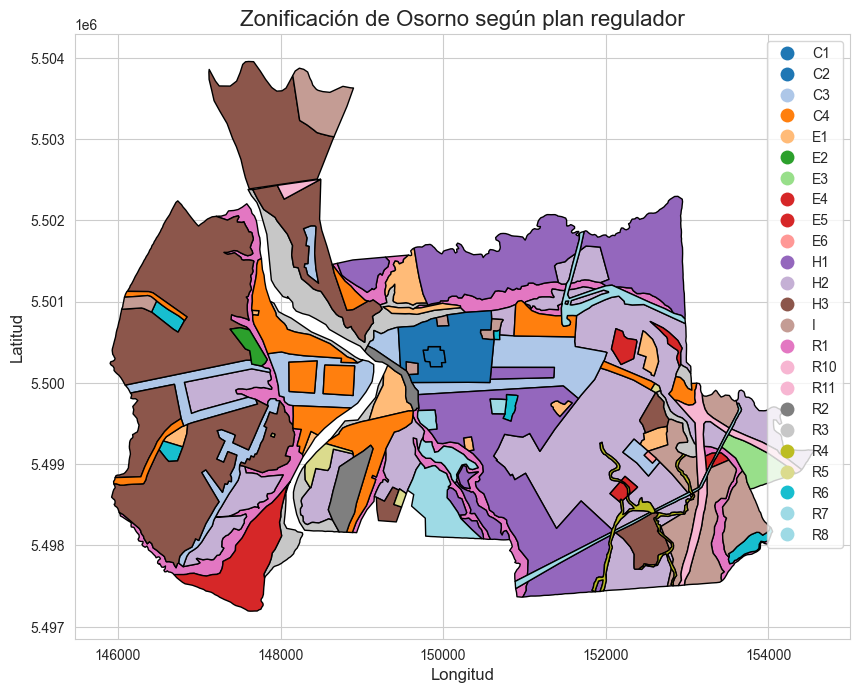

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo shapefile
shapefile_path =  r"Mapas/IPT_LOS LAGOS/PRC/IPT_10_PRC_Osorno.shp"
gdf = gpd.read_file(shapefile_path)

# Visualizar las columnas disponibles en el shapefile
print(gdf.columns)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='ZONA', cmap='tab20', legend=True, edgecolor='black')

# Configurar título y etiquetas
ax.set_title("Zonificación de Osorno según plan regulador", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Mostrar el gráfico
plt.show()


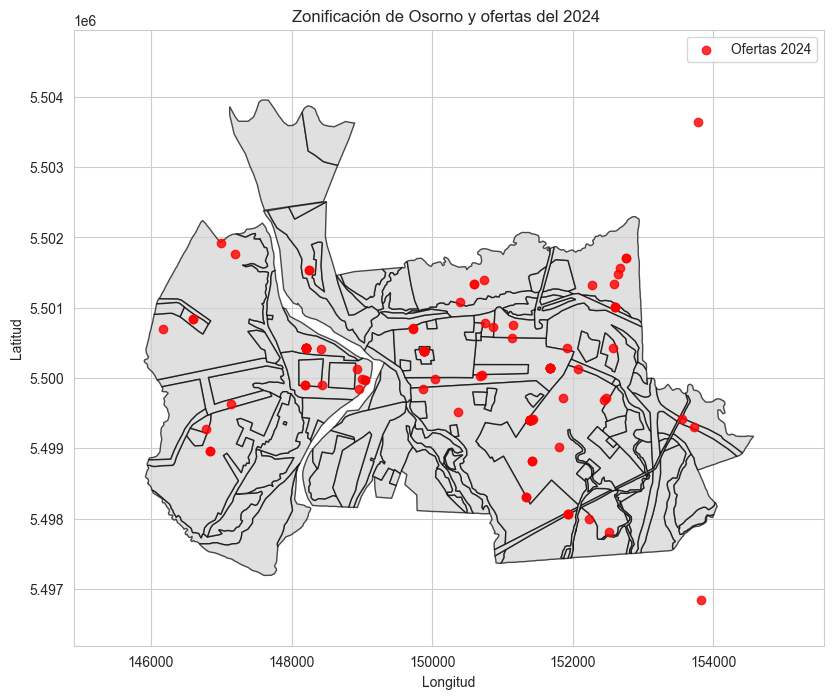

In [73]:
import geopandas as gpd
import pandas as pd
from pyproj import Transformer
import matplotlib.pyplot as plt
import numpy as np

# Cargar el shapefile
shapefile_path = r"Mapas/IPT_LOS LAGOS/PRC/IPT_10_PRC_Osorno.shp"
gdf = gpd.read_file(shapefile_path)

# Filtrar ofertas del 2024 en Osorno y válidas
data_ofertas_2024 = data_osorno_total[
    (data_osorno_total['semestre'].str.contains("2024")) &
    (data_osorno_total['latitude'] != 0) &
    (data_osorno_total['longitude'] != 0)
].copy()

# Eliminar outliers de las coordenadas válidas
def filtrar_outliers(df, columna_lat, columna_lon, factor=3):
    lat_mean = df[columna_lat].mean()
    lat_std = df[columna_lat].std()
    lon_mean = df[columna_lon].mean()
    lon_std = df[columna_lon].std()
    df_filtrado = df[
        (np.abs(df[columna_lat] - lat_mean) <= factor * lat_std) &
        (np.abs(df[columna_lon] - lon_mean) <= factor * lon_std)
    ]
    return df_filtrado

data_ofertas_2024 = filtrar_outliers(data_ofertas_2024, 'latitude', 'longitude')

# Filtrar por rango de superficie
data_ofertas_rango = data_ofertas_2024[
    data_ofertas_2024['rango_superficie'] == "500-4999 m2"
].copy()

# Transformar las coordenadas al CRS del shapefile
transformer = Transformer.from_crs("EPSG:4326", gdf.crs, always_xy=True)
data_ofertas_rango['x'], data_ofertas_rango['y'] = transformer.transform(
    data_ofertas_rango['longitude'].values, data_ofertas_rango['latitude'].values
)

# Calcular límites del shapefile para centrar el gráfico
bounds = gdf.total_bounds  # (xmin, ymin, xmax, ymax)
xlim = (bounds[0] - 1000, bounds[2] + 1000)  # Ajustar márgenes
ylim = (bounds[1] - 1000, bounds[3] + 1000)

# Graficar el shapefile y las ofertas
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)

# Graficar las ofertas
ax.scatter(
    data_ofertas_rango['x'], data_ofertas_rango['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8
)

# Ajustar límites y etiquetas
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title("Zonificación de Osorno y ofertas del 2024 (500-4999 m²)")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")
ax.legend()

plt.show()




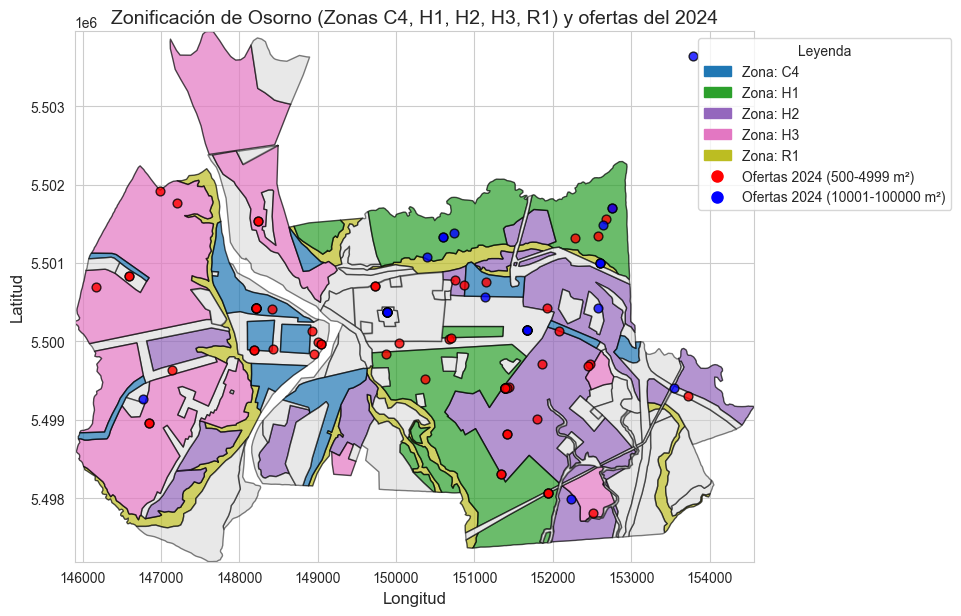

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd

# Leer el archivo shapefile
shapefile_path = r"Mapas/IPT_LOS LAGOS/PRC/IPT_10_PRC_Osorno.shp"
gdf = gpd.read_file(shapefile_path)

# Zonas de interés
zonas_interes = ['C4', 'H1', 'H2', 'H3', 'R1']

# Crear diccionario de colores: zonas de interés con colores, el resto en gris
color_dict = {zona: plt.cm.tab20(i / len(zonas_interes)) for i, zona in enumerate(zonas_interes)}
color_dict.update({zona: 'lightgrey' for zona in gdf['ZONA'].unique() if zona not in zonas_interes})

# Graficar las zonas
fig, ax = plt.subplots(figsize=(10, 8))
for zona in gdf['ZONA'].unique():
    color = color_dict[zona]
    alpha = 0.7 if zona in zonas_interes else 0.5  # Las zonas de interés más visibles
    gdf[gdf['ZONA'] == zona].plot(
        ax=ax, color=color, edgecolor='black', alpha=alpha, label=zona if zona in zonas_interes else None
    )

# Leer la data de ofertas y filtrar las correspondientes a Osorno 2024
data_ofertas = pd.read_csv('Mapas/data comunas/data_osorno_total.csv')
data_ofertas = data_ofertas[
    (data_ofertas['comuna_match'] == 'OSORNO') &
    ((data_ofertas['semestre'] == '2024S1') | (data_ofertas['semestre'] == '2024S2'))
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", gdf.crs, always_xy=True)
data_ofertas['x'], data_ofertas['y'] = transformer.transform(
    data_ofertas['longitude'], data_ofertas['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_ofertas[data_ofertas['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_ofertas[data_ofertas['rango_superficie'] == '10001-100000 m2']

# Graficar las ofertas sobre las zonas
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=40
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=40
)

# Ajustar los límites del gráfico
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Añadir título y etiquetas
ax.set_title("Zonificación de Osorno (Zonas C4, H1, H2, H3, R1) y ofertas del 2024", fontsize=14)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Crear una leyenda personalizada
handles = [
    mpatches.Patch(color=color_dict[zona], label=f"Zona: {zona}") for zona in zonas_interes
]
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1), title="Leyenda")

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


Index(['Shape_Leng', 'Shape_Area', 'REG', 'COM', 'LOC', 'ZONA', 'NOM', 'UPERM',
       'UPROH', 'P_DO', 'N_DOC', 'T_DO', 'OBS', 'geometry'],
      dtype='object')


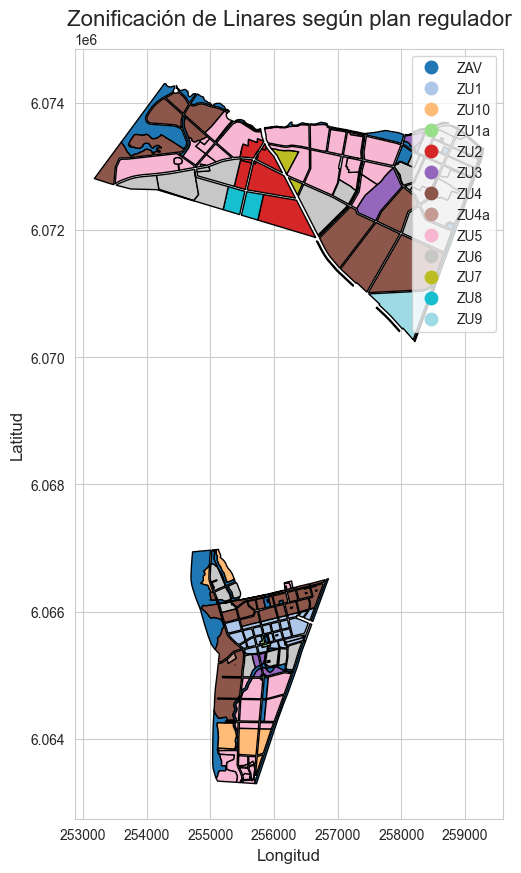

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo shapefile
shapefile_path =  r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Maule.shp"
gdf = gpd.read_file(shapefile_path)

# Visualizar las columnas disponibles en el shapefile
print(gdf.columns)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, column='ZONA', cmap='tab20', legend=True, edgecolor='black')

# Configurar título y etiquetas
ax.set_title("Zonificación de Linares según plan regulador", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Mostrar el gráfico
plt.show()

CRS del shapefile: EPSG:32719


C:\Users\franc\AppData\Local\Temp\ipykernel_14452\589444759.py:26: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf[gdf['ZONA'] == zona].plot(ax=ax, color=color, edgecolor='black', alpha=alpha)


Columnas de la data de ofertas: Index(['id', 'concat', 'publicada', 'created_at', 'data_source', 'tipo',
       'sub_tipo', 'precio_clp', 'precio_uf', 'region', 'comuna', 'latitude',
       'longitude', 'total_o_terreno', 'util_o_construido', 'active',
       'fecha_finalizacion', 'precio_clp_inicial', 'precio_uf_inicial',
       'descripcion_sin_saltos', 'direccion_sin_saltos', 'descripcion_2',
       'region_norm', 'comuna_norm', 'comuna_match', 'superficies_dict',
       'mayor_superficie', 'diferencia_pct', 'diferencia_abs', 'semestre',
       'descripcion_normalizada', 'duplicados_con', 'duplicado',
       'valor_uf_inicial', 'valor_uf', 'margen_uf_inicial', 'margen_uf',
       'dif_pct_abs', 'UF_Ha', 'total_o_terreno_ha', 'UF_Ha_inicial',
       'superficie_Ha', 'valores_terreno', 'costo_m2_uf', 'rango_superficie',
       'is_outlier', 'categoria', 'semestre_rango'],
      dtype='object')
Número de ofertas en la data: 361


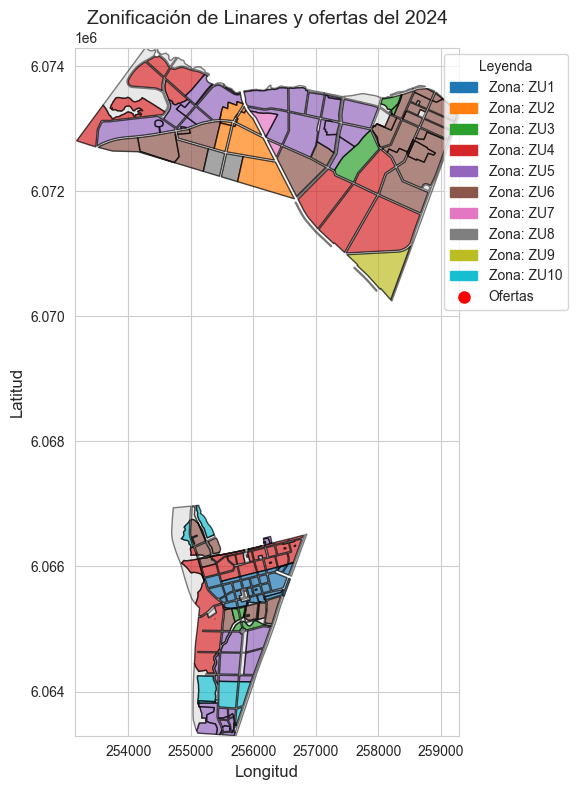

In [89]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyproj import Transformer

# Leer el archivo shapefile
shapefile_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Maule.shp"
gdf = gpd.read_file(shapefile_path)

# Asegurar que el CRS está definido
print(f"CRS del shapefile: {gdf.crs}")

# Zonas de interés
zonas_interes = ['ZU1', 'ZU2', 'ZU3', 'ZU4', 'ZU5', 'ZU6', 'ZU7', 'ZU8', 'ZU9', 'ZU10']

# Crear diccionario de colores
color_dict = {zona: plt.cm.tab20(i / len(zonas_interes)) for i, zona in enumerate(zonas_interes)}
color_dict.update({zona: 'lightgrey' for zona in gdf['ZONA'].unique() if zona not in zonas_interes})

# Graficar las zonas
fig, ax = plt.subplots(figsize=(10, 8))
for zona in gdf['ZONA'].unique():
    color = color_dict[zona]
    alpha = 0.7 if zona in zonas_interes else 0.5
    gdf[gdf['ZONA'] == zona].plot(ax=ax, color=color, edgecolor='black', alpha=alpha)

# Leer la data de ofertas
data_ofertas = pd.read_csv('Mapas/data comunas/data_linares_total.csv')

# Verificar columnas y contenido
print(f"Columnas de la data de ofertas: {data_ofertas.columns}")
print(f"Número de ofertas en la data: {len(data_ofertas)}")

# Filtrar coordenadas válidas
data_ofertas = data_ofertas[(data_ofertas['latitude'] != 0) & (data_ofertas['longitude'] != 0)]

# Convertir CRS de las ofertas al mismo CRS del shapefile
transformer = Transformer.from_crs("EPSG:4326", gdf.crs, always_xy=True)
data_ofertas['x'], data_ofertas['y'] = transformer.transform(
    data_ofertas['longitude'], data_ofertas['latitude']
)

# Graficar las ofertas
ax.scatter(
    data_ofertas['x'], data_ofertas['y'],
    color='red', label='Ofertas', alpha=0.8, edgecolor='black', s=40
)

# Ajustar límites
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Añadir título y leyendas
ax.set_title("Zonificación de Linares y ofertas del 2024", fontsize=14)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

handles = [
    mpatches.Patch(color=color_dict[zona], label=f"Zona: {zona}") for zona in zonas_interes
]
handles.append(
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas')
)
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1), title="Leyenda")

plt.tight_layout()
plt.show()


In [7]:
data_colbun_total = data_2021[(data_2021['comuna_match'] == 'COLBUN') & ((data_2021['rango_superficie'] == "500-4999 m2") | (data_2021['rango_superficie'] == '10001-100000 m2'))]
data_colbun_total

,id,concat,publicada,created_at,data_source,tipo,sub_tipo,precio_clp,precio_uf,region,...,margen_uf,dif_pct_abs,UF_Ha,total_o_terreno_ha,UF_Ha_inicial,superficie_Ha,valores_terreno,costo_m2_uf,rango_superficie,is_outlier
20140,875215,https://www.yapo.cl/maule/comprar/terreno_en_c...,2021-02-25,2021-02-24,Yapo,Terreno,Terreno,1.800000e+04,0.610000,MAULE,...,1,NaN,1.525000,0.400000,1.525000,0.400000,{},0.000152,500-4999 m2,0
20141,891770,https://www.yapo.cl/maule/comprar/terreno_con_...,2021-02-24,2021-02-24,Yapo,Terreno,Terreno,9.070166e+07,3107.000000,MAULE,...,1,0.005585,6941.077911,0.447625,6941.077911,0.447625,"{'valor_1': {'valor': 13.0, 'moneda': 'descono...",0.694108,500-4999 m2,0
20142,1384056,https://www.yapo.cl/maule/comprar/exclusivo_te...,2021-04-03,2021-04-03,Yapo,Terreno,Terreno,2.650000e+07,901.630000,MAULE,...,1,66.666667,3005.433333,0.300000,3005.433333,0.300000,"{'valor_1': {'valor': 3000.0, 'moneda': 'desco...",0.300543,500-4999 m2,0
20143,1481924,https://www.economicos.cl/propiedades/terreno-...,2021-05-04,2021-05-05,Economicos,Terreno,Terreno,3.500000e+08,11905.345024,MAULE,...,1,3373.333333,79368.966825,0.150000,79368.966825,0.150000,"{'valor_1': {'valor': 190.0, 'moneda': 'descon...",7.936897,500-4999 m2,0
20144,1492085,https://www.yapo.cl/maule/comprar/terreno_en_l...,2021-05-09,2021-05-11,Yapo,Terreno,Terreno,3.500000e+07,1185.100000,MAULE,...,1,NaN,4740.400000,0.250000,4740.400000,0.250000,"{'valor_1': {'valor': 569.0, 'moneda': 'descon...",0.474040,500-4999 m2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167534,6848439,https://www.portalinmobiliario.com/MLC-1453502...,2024-03-30,2024-01-05,Portalinmobiliario,Terreno,Agrícola,3.330000e+08,8937.912909,MAULE,...,1,NaN,993.101434,9.000000,1005.499266,9.000000,"{'valor_1': {'valor': 30.0, 'moneda': 'descono...",0.099310,10001-100000 m2,0
167535,6061930,https://propiedades.elmercurio.com/propiedades...,2024-07-29,2023-06-09,Mercurio,Terreno,Terreno,1.099056e+09,29245.000000,MAULE,...,1,0.000000,6000.082066,4.874100,6000.082066,4.874100,"{'valor_1': {'valor': 48741.0, 'moneda': 'desc...",0.600008,10001-100000 m2,0
167536,7712018,https://www.portalinmobiliario.com/MLC-1499418...,2024-07-02,2024-07-04,Portalinmobiliario,Terreno,Terreno,1.288450e+09,34000.000000,MAULE,...,1,0.000000,8500.000000,4.000000,8500.000000,4.000000,"{'valor_1': {'valor': 4.0, 'moneda': 'CLP', 'u...",0.850000,10001-100000 m2,0
167537,7859082,https://www.yapo.cl/inmuebles/propiedad_89797625,2024-07-04,2024-07-27,Yapo,Terreno,Terreno,8.000000e+08,21282.329521,MAULE,...,1,1.143151,10958.975037,1.942000,10958.975037,1.942000,"{'valor_1': {'valor': 240.0, 'moneda': 'descon...",1.095898,10001-100000 m2,0


In [8]:
data_colbun_total.to_csv("Mapas/data comunas/data_colbun_total.csv", index = False)

## Estudio precios Colbún

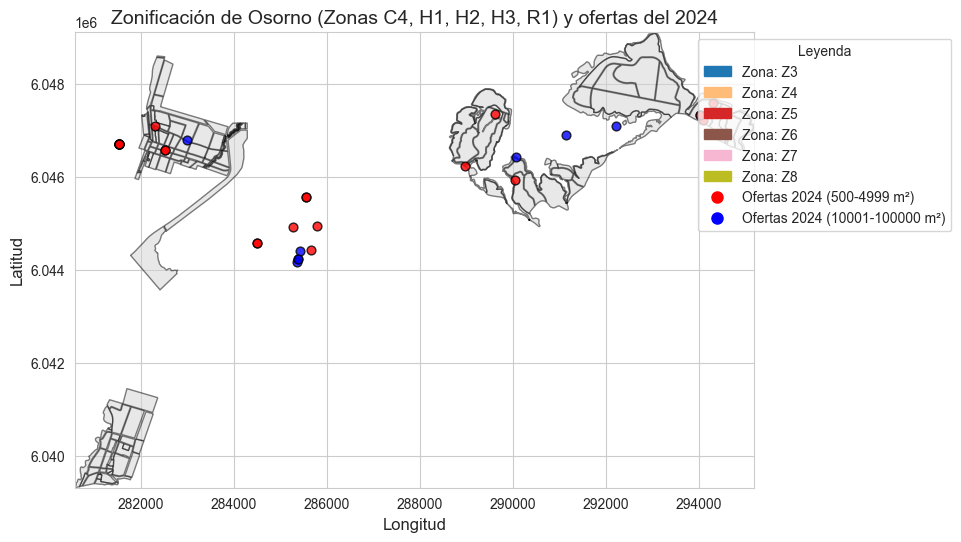

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd

# Leer el archivo shapefile
shapefile_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp"
gdf = gpd.read_file(shapefile_path)

# Zonas de interés
zonas_interes = ['Z3', 'Z4', 'Z5', 'Z6', 'Z7','Z8']


# Crear diccionario de colores: zonas de interés con colores, el resto en gris
color_dict = {zona: plt.cm.tab20(i / len(zonas_interes)) for i, zona in enumerate(zonas_interes)}
color_dict.update({zona: 'lightgrey' for zona in gdf['ZONA'].unique() if zona not in zonas_interes})

# Graficar las zonas
fig, ax = plt.subplots(figsize=(10, 8))
for zona in gdf['ZONA'].unique():
    color = color_dict[zona]
    alpha = 0.7 if zona in zonas_interes else 0.5  # Las zonas de interés más visibles
    gdf[gdf['ZONA'] == zona].plot(
        ax=ax, color=color, edgecolor='black', alpha=alpha, label=zona if zona in zonas_interes else None
    )

# Leer la data de ofertas y filtrar las correspondientes a Osorno 2024
data_ofertas = pd.read_csv("Mapas/data comunas/data_colbun_total.csv")
data_ofertas = data_ofertas[
    (data_ofertas['comuna_match'] == 'COLBUN') &
    ((data_ofertas['semestre'] == '2024S1') | (data_ofertas['semestre'] == '2024S2'))
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", gdf.crs, always_xy=True)
data_ofertas['x'], data_ofertas['y'] = transformer.transform(
    data_ofertas['longitude'], data_ofertas['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_ofertas[data_ofertas['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_ofertas[data_ofertas['rango_superficie'] == '10001-100000 m2']

# Graficar las ofertas sobre las zonas
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=40
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=40
)

# Ajustar los límites del gráfico
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])

# Añadir título y etiquetas
ax.set_title("Zonificación de Osorno (Zonas C4, H1, H2, H3, R1) y ofertas del 2024", fontsize=14)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Crear una leyenda personalizada
handles = [
    mpatches.Patch(color=color_dict[zona], label=f"Zona: {zona}") for zona in zonas_interes
]
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1), title="Leyenda")

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

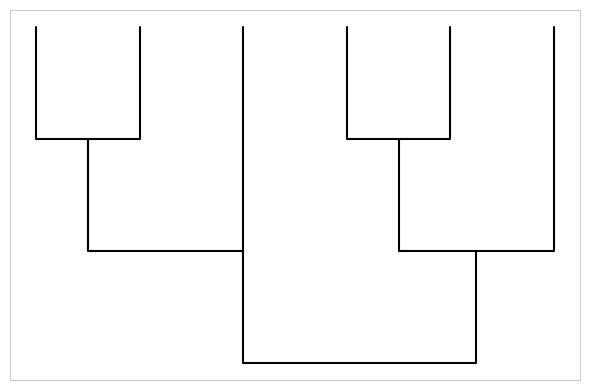

In [10]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(6, 4))

# Nivel 1: Conexión entre A y B
plt.plot([1, 1, 2, 2], [0, 2, 2, 0], 'k-')

# Nivel 1: Conexión entre D y E
plt.plot([4, 4, 5, 5], [0, 2, 2, 0], 'k-')

# Nivel 2: Conexión entre A-B y C
plt.plot([1.5, 1.5, 3, 3], [2, 4, 4, 0], 'k-')

# Nivel 2: Conexión entre D-E y F
plt.plot([4.5, 4.5, 6, 6], [2, 4, 4, 0], 'k-')

# Nivel 3: Conexión entre (A-B-C) y (D-E-F)
plt.plot([3, 3, 5.25, 5.25], [4, 6, 6, 4], 'k-')

# Etiquetas de las hojas
#plt.text(1, -0.5, 'A', ha='center', fontsize=12)
#plt.text(2, -0.5, 'B', ha='center', fontsize=12)
#plt.text(3, -0.5, 'C', ha='center', fontsize=12)
#plt.text(4, -0.5, 'D', ha='center', fontsize=12)
#plt.text(5, -0.5, 'E', ha='center', fontsize=12)
#plt.text(6, -0.5, 'F', ha='center', fontsize=12)

# Configuración del gráfico
#plt.title("Dendrograma", fontsize=14)
plt.xticks([])
plt.yticks([])
plt.gca().invert_yaxis()  # Invertir eje Y para que el dendrograma esté en la dirección correcta
plt.tight_layout()

# Mostrar el gráfico
plt.show()


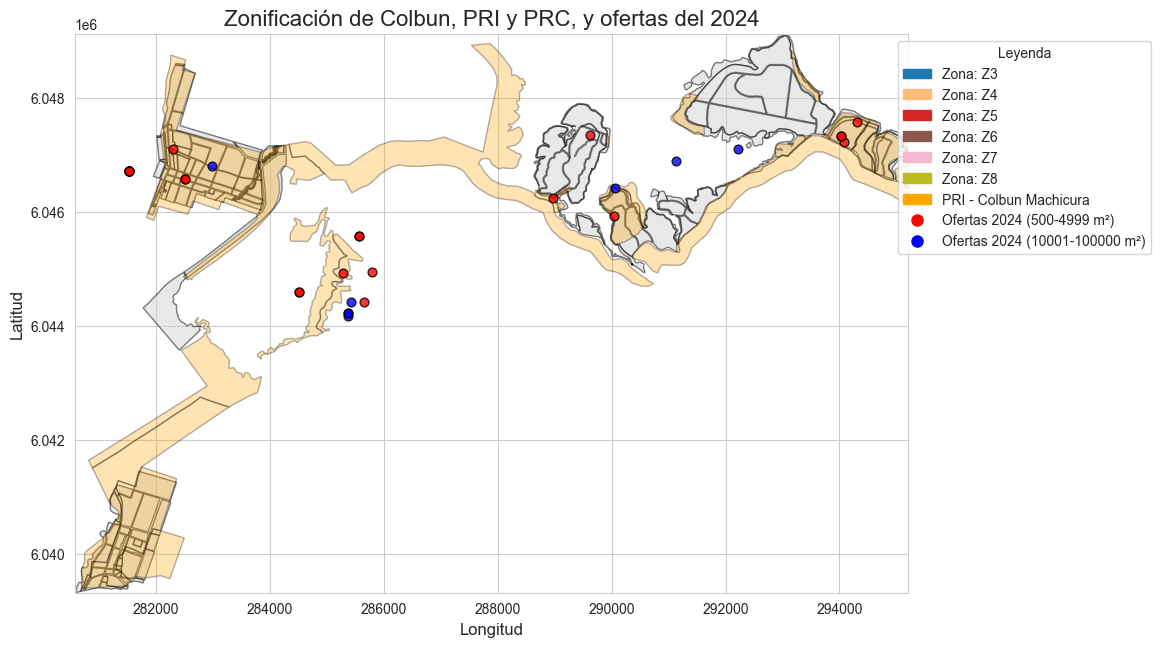

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd

# Leer los archivos shapefile
shapefile_prc_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp"
shapefile_pri_path = r"Mapas/IPT_Maule/PRI/IPT_07_PRI_Colbun_Machicura.shp"
gdf_prc = gpd.read_file(shapefile_prc_path)
gdf_pri = gpd.read_file(shapefile_pri_path)

# Zonas de interés
zonas_interes = ['Z3', 'Z4', 'Z5', 'Z6', 'Z7','Z8']

# Crear diccionario de colores: zonas de interés con colores, el resto en gris
color_dict_prc = {zona: plt.cm.tab20(i / len(zonas_interes)) for i, zona in enumerate(zonas_interes)}
color_dict_prc.update({zona: 'lightgrey' for zona in gdf_prc['ZONA'].unique() if zona not in zonas_interes})

# Graficar las zonas
fig, ax = plt.subplots(figsize=(12, 10))
for zona in gdf_prc['ZONA'].unique():
    color = color_dict_prc[zona]
    alpha = 0.7 if zona in zonas_interes else 0.5  # Las zonas de interés más visibles
    gdf_prc[gdf_prc['ZONA'] == zona].plot(
        ax=ax, color=color, edgecolor='black', alpha=alpha, label=zona if zona in zonas_interes else None
    )

# Graficar el segundo shapefile (PRI) en otro color
gdf_pri.plot(ax=ax, color='orange', edgecolor='black', alpha=0.3, label='PRI - Colbun Machicura')

# Leer la data de ofertas y filtrar las correspondientes a Colbun 2024
data_ofertas = pd.read_csv("Mapas/data comunas/data_colbun_total.csv")
data_ofertas = data_ofertas[
    (data_ofertas['comuna_match'] == 'COLBUN') &
    ((data_ofertas['semestre'] == '2024S1') | (data_ofertas['semestre'] == '2024S2'))
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", gdf_prc.crs, always_xy=True)
data_ofertas['x'], data_ofertas['y'] = transformer.transform(
    data_ofertas['longitude'], data_ofertas['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_ofertas[data_ofertas['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_ofertas[data_ofertas['rango_superficie'] == '10001-100000 m2']

# Graficar las ofertas sobre las zonas
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=40
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=40
)

# Ajustar los límites del gráfico
ax.set_xlim(gdf_prc.total_bounds[0], gdf_prc.total_bounds[2])
ax.set_ylim(gdf_prc.total_bounds[1], gdf_prc.total_bounds[3])

# Añadir título y etiquetas
ax.set_title("Zonificación de Colbun, PRI y PRC, y ofertas del 2024", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Crear una leyenda personalizada
handles = [
    mpatches.Patch(color=color_dict_prc[zona], label=f"Zona: {zona}") for zona in zonas_interes
]
handles.append(
    mpatches.Patch(color='orange', label='PRI - Colbun Machicura')
)
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.3, 1), title="Leyenda")

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


In [6]:
import geopandas as gpd

# Ruta del shapefile que contiene todas las comunas
shapefile_comunas_path = "Mapas/comunas.shx"

# Leer el shapefile completo
gdf_comunas = gpd.read_file(shapefile_comunas_path)

# Comunas que deseas filtrar
comunas_interes = ['Linares', 'Colbún', 'Yerbas Beunas','Villa Alegre', 'Longaví']  # Cambia los nombres según las comunas de tu interés

# Filtrar solo las comunas de interés
gdf_filtrado = gdf_comunas[gdf_comunas['Comuna']  # Reemplaza 'NOMBRE_COLUMN' con el nombre correcto de la columna
                          .isin(comunas_interes)]

# Verificar el resultado
print(gdf_filtrado)

     objectid     shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
80        271  288033.759891        18         9        7401          7   
81        272  267604.712137        18         9        7403          7   
281       276   72730.468257        18         9        7407          7   
308       270  435841.141193        18         9        7402          7   

       st_area_sh     st_length_            Region        Comuna Provincia  \
80   2.245999e+09  356106.042176  Región del Maule       Linares   Linares   
81   2.231920e+09  331498.941045  Región del Maule       Longaví   Linares   
281  2.858658e+08   89631.789282  Región del Maule  Villa Alegre   Linares   
308  4.491300e+09  539510.537650  Región del Maule        Colbún   Linares   

                                              geometry  
80   POLYGON ((-7985849.573 -4260052.542, -7985792....  
81   POLYGON ((-7992033.849 -4271202.568, -7991960....  
281  POLYGON ((-7973493.034 -4251929.24, -7972942.3...  
308  

In [38]:
shapefile_prc_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp.shp"
# Leer el shapefile completo
gdf_colbun = gpd.read_file(shapefile_comunas_path)
gdf_colbun.columns

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')

In [36]:
shapefile_prc_path = r"Mapas/IPT_LOS LAGOS/PRC/IPT_10_PRC_Osorno.shp"
# Leer el shapefile completo
gdf_colbun = gpd.read_file(shapefile_comunas_path)
gdf_colbun.columns

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')

In [5]:
gdf_comunas[gdf_comunas['Provincia'] == 'Linares']

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
80,271,288033.759891,18,9,7401,7,2.245999e+09,356106.042176,Región del Maule,Linares,Linares,"POLYGON ((-7985849.573 -4260052.542, -7985792...."
81,272,267604.712137,18,9,7403,7,2.231920e+09,331498.941045,Región del Maule,Longaví,Linares,"POLYGON ((-7992033.849 -4271202.568, -7991960...."
280,275,218476.078277,18,9,7406,7,1.993974e+09,272061.041156,Región del Maule,San Javier,Linares,"POLYGON ((-7976461.511 -4240353.868, -7976417...."
281,276,72730.468257,18,9,7407,7,2.858658e+08,89631.789282,Región del Maule,Villa Alegre,Linares,"POLYGON ((-7973493.034 -4251929.24, -7972942.3..."
282,277,87657.194262,18,9,7408,7,3.911515e+08,108431.338218,Región del Maule,Yerbas Buenas,Linares,"POLYGON ((-7967767.337 -4243798.027, -7967793...."
293,274,199520.562087,18,9,7405,7,1.264039e+09,246638.207130,Región del Maule,Retiro,Linares,"POLYGON ((-8007939.94 -4277107.679, -8007828.6..."
308,270,435841.141193,18,9,7402,7,4.491300e+09,539510.537650,Región del Maule,Colbún,Linares,"POLYGON ((-7867323.105 -4334942.486, -7867628...."
337,273,353001.423634,18,9,7404,7,2.521923e+09,435750.546027,Región del Maule,Parral,Linares,"POLYGON ((-8017604.471 -4289122.15, -8017547.9..."



Geodataframe filtrado:
     objectid     shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
80        271  288033.759891        18         9        7401          7   
282       277   87657.194262        18         9        7408          7   
308       270  435841.141193        18         9        7402          7   

       st_area_sh     st_length_            Region         Comuna Provincia  \
80   2.245999e+09  356106.042176  Región del Maule        Linares   Linares   
282  3.911515e+08  108431.338218  Región del Maule  Yerbas Buenas   Linares   
308  4.491300e+09  539510.537650  Región del Maule         Colbún   Linares   

                                              geometry  
80   POLYGON ((-7985849.573 -4260052.542, -7985792....  
282  POLYGON ((-7967767.337 -4243798.027, -7967793....  
308  POLYGON ((-7867323.105 -4334942.486, -7867628....  


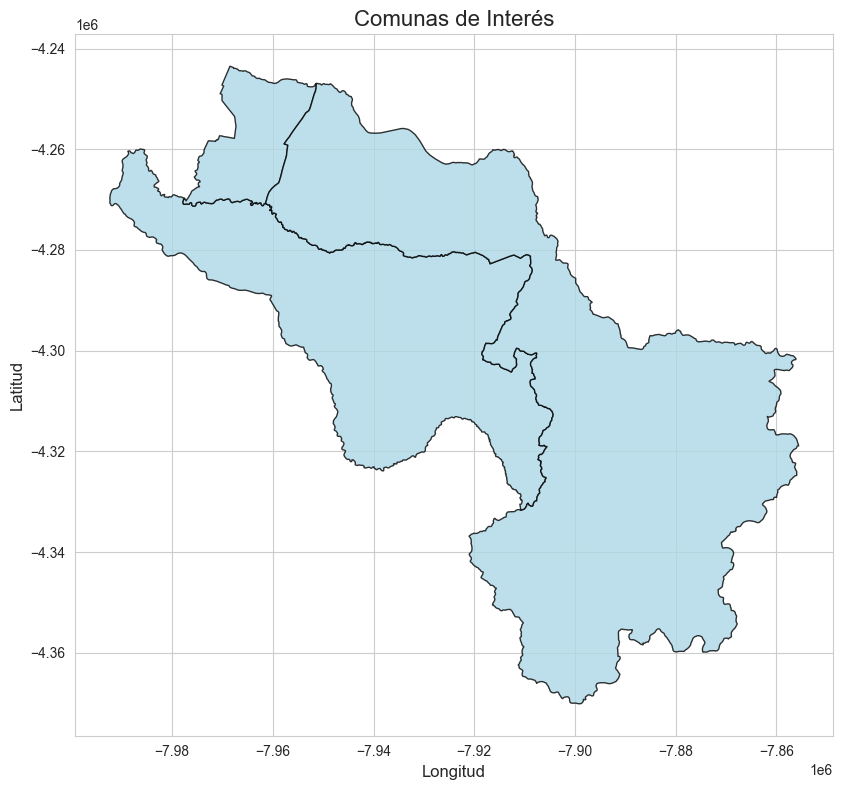

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta del shapefile que contiene todas las comunas
shapefile_comunas_path = "Mapas/comunas.shp"  # Cambia a la ruta exacta de tu archivo

# Leer el shapefile completo
gdf_comunas = gpd.read_file(shapefile_comunas_path)

# Comunas que deseas filtrar
comunas_interes = ['Linares', 'Colbún', 'Yerbas Buenas'] #, 'Villa Alegre', 'Longaví']

# Filtrar solo las comunas de interés
gdf_filtrado = gdf_comunas[gdf_comunas['Comuna'].isin(comunas_interes)]

# Verificar el resultado del filtrado
print("\nGeodataframe filtrado:")
print(gdf_filtrado)

# Graficar las comunas filtradas
fig, ax = plt.subplots(figsize=(10, 8))
gdf_filtrado.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.8)

# Títulos y etiquetas
ax.set_title("Comunas de Interés", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_11736\2083720492.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='upper right', title="Capas", fontsize=10)
C:\Users\franc\AppData\Local\Temp\ipykernel_11736\2083720492.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right', title="Capas", fontsize=10)


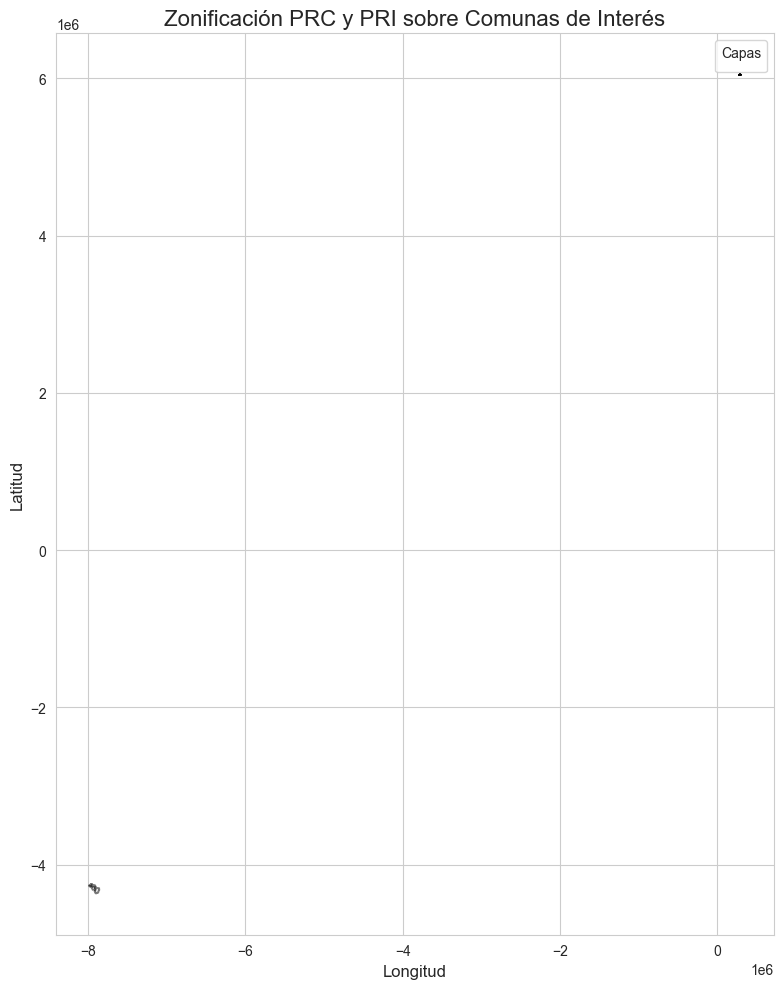

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta del shapefile que contiene todas las comunas
shapefile_comunas_path = "Mapas/comunas.shp"

# Leer los archivos shapefile
shapefile_prc_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp"
shapefile_pri_path = r"Mapas/IPT_Maule/PRI/IPT_07_PRI_Colbun_Machicura.shp"
gdf_prc = gpd.read_file(shapefile_prc_path)
gdf_pri = gpd.read_file(shapefile_pri_path)

# Leer el shapefile completo de comunas y filtrar las comunas de interés
comunas_interes = ['Linares', 'Colbún', 'Yerbas Buenas']
gdf_comunas = gpd.read_file(shapefile_comunas_path)
gdf_comunas_filtrado = gdf_comunas[gdf_comunas['Comuna'].isin(comunas_interes)]

# Crear el gráfico combinado
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar las comunas filtradas
gdf_comunas_filtrado.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label="Comunas de interés")

# Graficar las zonas PRC
gdf_prc.plot(ax=ax, color='skyblue', edgecolor='black', alpha=0.7, label="Zonas PRC")

# Graficar las zonas PRI
gdf_pri.plot(ax=ax, color='salmon', edgecolor='black', alpha=0.7, label="Zonas PRI")

# Configurar títulos y etiquetas
ax.set_title("Zonificación PRC y PRI sobre Comunas de Interés", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir leyenda
ax.legend(loc='upper right', title="Capas", fontsize=10)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
data_2021 = pd.read_csv("data recuperada/data_sin_outliers.csv")

In [22]:
data_2021['comuna_match'].unique()

array(['ALGARROBO', 'ALHUE', 'ALTO BIOBIO', 'ALTO DEL CARMEN',
       'ALTO HOSPICIO', 'ANCUD', 'ANDACOLLO', 'ANGOL', 'ANTOFAGASTA',
       'ANTUCO', 'ARAUCO', 'ARICA', 'AYSEN', 'BUIN', 'BULNES', 'CABILDO',
       'CABRERO', 'CALAMA', 'CALBUCO', 'CALDERA', 'CALERA DE TANGO',
       'CALLE LARGA', 'CANELA', 'CANETE', 'CARAHUE', 'CARTAGENA',
       'CASABLANCA', 'CASTRO', 'CATEMU', 'CAUQUENES', 'CERRILLOS',
       'CERRO NAVIA', 'CHAITEN', 'CHANARAL', 'CHANCO', 'CHEPICA',
       'CHIGUAYANTE', 'CHILE CHICO', 'CHILLAN', 'CHILLAN VIEJO',
       'CHIMBARONGO', 'CHOLCHOL', 'CHONCHI', 'CISNES', 'COBQUECURA',
       'COCHAMO', 'COCHRANE', 'CODEGUA', 'COELEMU', 'COIHUECO', 'COINCO',
       'COLBUN', 'COLINA', 'COLLIPULLI', 'COLTAUCO', 'COMBARBALA',
       'CONCEPCION', 'CONCHALI', 'CONCON', 'CONSTITUCION', 'CONTULMO',
       'COPIAPO', 'COQUIMBO', 'CORONEL', 'CORRAL', 'COYHAIQUE', 'CUNCO',
       'CURACAUTIN', 'CURACAVI', 'CURACO DE VELEZ', 'CURANILAHUE',
       'CURARREHUE', 'CUREPTO', 'CURICO

In [24]:
data_2021[data_2021['comuna_match'] == 'YERBAS BUENAS']

,id,concat,publicada,created_at,data_source,tipo,sub_tipo,precio_clp,precio_uf,region,...,margen_uf,dif_pct_abs,UF_Ha,total_o_terreno_ha,UF_Ha_inicial,superficie_Ha,valores_terreno,costo_m2_uf,rango_superficie,is_outlier
16460,1571056,https://www.yapo.cl/maule/comprar/parcelas_787...,2021-06-30,2021-07-01,Yapo,Terreno,Terreno,30000000.0,998.390000,MAULE,...,1,NaN,66559.333333,0.0150,66559.333333,0.0150,"{'valor_1': {'valor': 15.0, 'moneda': 'descono...",6.655933,100-499 m2,0
16461,1149387,https://www.yapo.cl/maule/comprar/parcela_7704...,2021-02-26,2021-03-05,Yapo,Terreno,Terreno,40000000.0,1365.430000,MAULE,...,1,4066.666667,56892.916667,0.0240,56892.916667,0.0240,"{'valor_1': {'valor': 15.0, 'moneda': 'descono...",5.689292,100-499 m2,0
16462,1668620,https://www.yapo.cl/maule/comprar/sitios_cerra...,2021-09-15,2021-08-17,Yapo,Terreno,Terreno,17000000.0,565.750000,MAULE,...,1,0.000000,25369.955157,0.0223,25369.955157,0.0223,"{'valor_1': {'valor': 223.0, 'moneda': 'descon...",2.536996,100-499 m2,0
16463,1776275,https://www.yapo.cl/maule/comprar/sitio_797486...,2021-09-10,2021-09-12,Yapo,Terreno,Terreno,11000000.0,366.070000,MAULE,...,1,NaN,12202.333333,0.0300,12202.333333,0.0300,"{'valor_1': {'valor': 10.0, 'moneda': 'descono...",1.220233,100-499 m2,0
16464,4456267,https://new.yapo.cl/inmuebles/propiedad_83526843,2022-06-27,2022-06-29,Yapo,Terreno,Terreno,15000000.0,479.587171,MAULE,...,1,0.000000,11989.679284,0.0400,11989.679284,0.0400,"{'valor_1': {'valor': 400.0, 'moneda': 'descon...",1.198968,100-499 m2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200199,7618535,https://www.portalinmobiliario.com/MLC-2500186...,2024-06-14,2024-06-15,Portalinmobiliario,Terreno,Agrícola,977560002.0,25968.000000,MAULE,...,1,0.000000,865.600000,30.0000,865.600000,30.0000,"{'valor_1': {'valor': 16.0, 'moneda': 'descono...",0.086560,>100000 m2,0
200200,7641758,https://www.portalinmobiliario.com/MLC-1494612...,2024-06-18,2024-06-20,Portalinmobiliario,Terreno,Agrícola,858000000.0,22820.144283,MAULE,...,1,NaN,877.697857,26.0000,879.457785,26.0000,"{'valor_1': {'valor': 30.0, 'moneda': 'descono...",0.087770,>100000 m2,0
200201,7680314,https://www.portalinmobiliario.com/MLC-2529417...,2024-06-26,2024-06-28,Portalinmobiliario,Terreno,Terreno,590000000.0,15701.674570,MAULE,...,1,0.000000,700.967615,22.4000,701.457647,22.4000,"{'valor_1': {'valor': 224.0, 'moneda': 'CLP', ...",0.070097,>100000 m2,0
200202,7820171,https://www.portalinmobiliario.com/MLC-1506681...,2024-07-23,2024-07-24,Portalinmobiliario,Terreno,Agrícola,850000000.0,22612.475116,MAULE,...,1,NaN,665.072798,34.0000,665.072798,34.0000,{},0.066507,>100000 m2,0


In [26]:
data_prov_linares_2024 = data_2021[((data_2021['comuna_match'] == 'LINARES') | (data_2021['comuna_match'] == 'YERBAS BUENAS') | (data_2021['comuna_match'] == 'COLBUN')) & ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2'))]

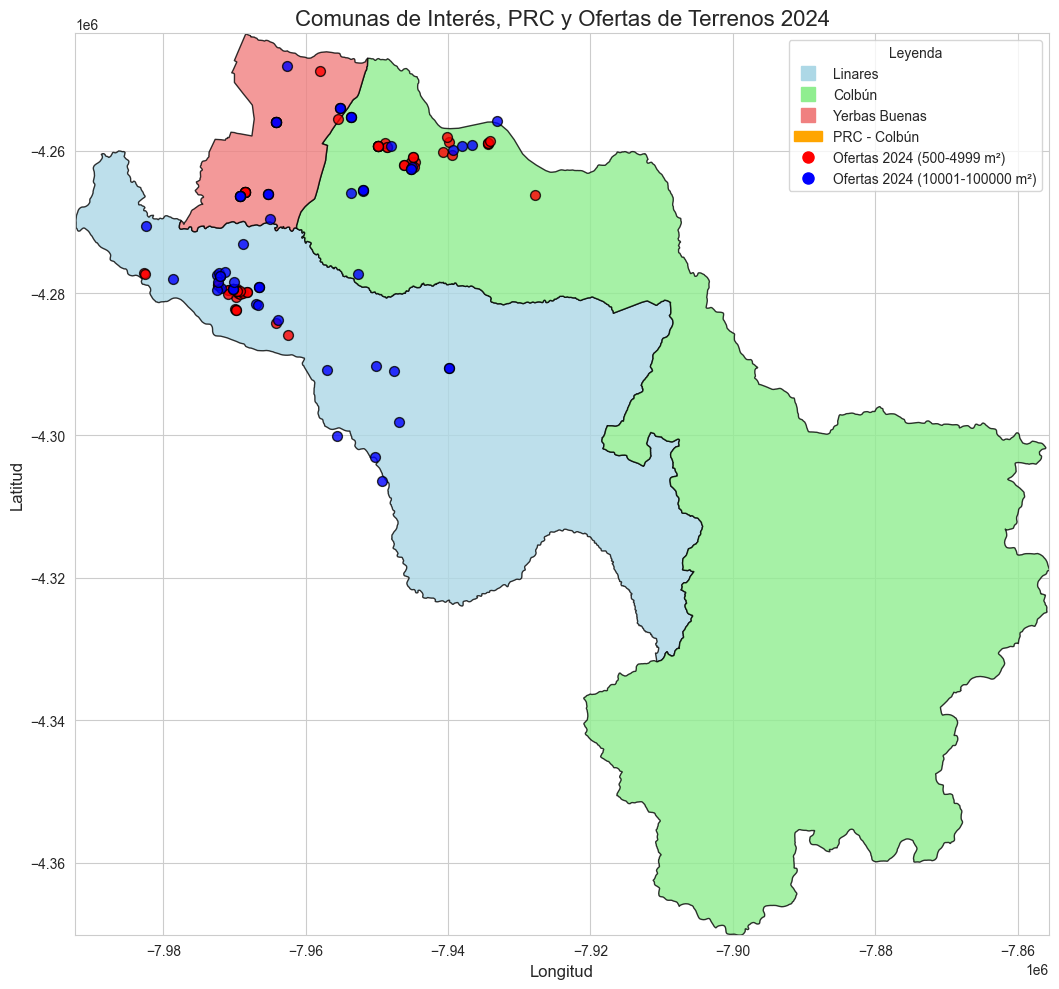

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer

# Rutas de los shapefiles
shapefile_comunas_path = "Mapas/comunas.shp"
shapefile_prc_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp"

# Leer los shapefiles
gdf_comunas = gpd.read_file(shapefile_comunas_path)
gdf_prc = gpd.read_file(shapefile_prc_path)

# Comunas que deseas filtrar
comunas_interes = ['Linares', 'Colbún', 'Yerbas Buenas']

# Filtrar solo las comunas de interés
gdf_filtrado = gdf_comunas[gdf_comunas['Comuna'].isin(comunas_interes)]

# Data de ofertas de terrenos para las comunas seleccionadas
data_prov_linares_2024 = data_2021[
    ((data_2021['comuna_match'] == 'LINARES') | 
     (data_2021['comuna_match'] == 'YERBAS BUENAS') | 
     (data_2021['comuna_match'] == 'COLBUN')) &
    ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2'))
]

# Eliminar ofertas con outliers en longitud y latitud (basado en percentiles)
lat_min, lat_max = data_prov_linares_2024['latitude'].quantile([0.01, 0.99])
lon_min, lon_max = data_prov_linares_2024['longitude'].quantile([0.01, 0.99])
data_prov_linares_2024 = data_prov_linares_2024[
    (data_prov_linares_2024['latitude'] >= lat_min) & 
    (data_prov_linares_2024['latitude'] <= lat_max) &
    (data_prov_linares_2024['longitude'] >= lon_min) & 
    (data_prov_linares_2024['longitude'] <= lon_max)
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
transformer = Transformer.from_crs("EPSG:4326", gdf_comunas.crs, always_xy=True)
data_prov_linares_2024['x'], data_prov_linares_2024['y'] = transformer.transform(
    data_prov_linares_2024['longitude'], data_prov_linares_2024['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_prov_linares_2024[data_prov_linares_2024['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_prov_linares_2024[data_prov_linares_2024['rango_superficie'] == '10001-100000 m2']

# Asignar colores únicos a cada comuna
comuna_colors = {
    'Linares': 'lightblue',
    'Colbún': 'lightgreen',
    'Yerbas Buenas': 'lightcoral'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar las comunas de interés con colores únicos
for comuna, color in comuna_colors.items():
    gdf_comuna = gdf_filtrado[gdf_filtrado['Comuna'] == comuna]
    gdf_comuna.plot(ax=ax, color=color, edgecolor='black', alpha=0.8, label=comuna)

# Graficar las zonas del PRC
gdf_prc.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5, label='PRC - Colbún')

# Graficar las ofertas de terrenos
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=50
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=50
)

# Añadir títulos y etiquetas
ax.set_title("Comunas de Interés, PRC y Ofertas de Terrenos 2024", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir leyenda personalizada
handles = [
    plt.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=comuna)
    for comuna, color in comuna_colors.items()
]
handles.append(
    mpatches.Patch(color='orange', label='PRC - Colbún')
)
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', fontsize=10, title="Leyenda")

# Ajustar los límites del gráfico
total_bounds = gdf_filtrado.total_bounds
ax.set_xlim(total_bounds[0], total_bounds[2])
ax.set_ylim(total_bounds[1], total_bounds[3])

# Mostrar el gráfico
plt.tight_layout()
plt.show()



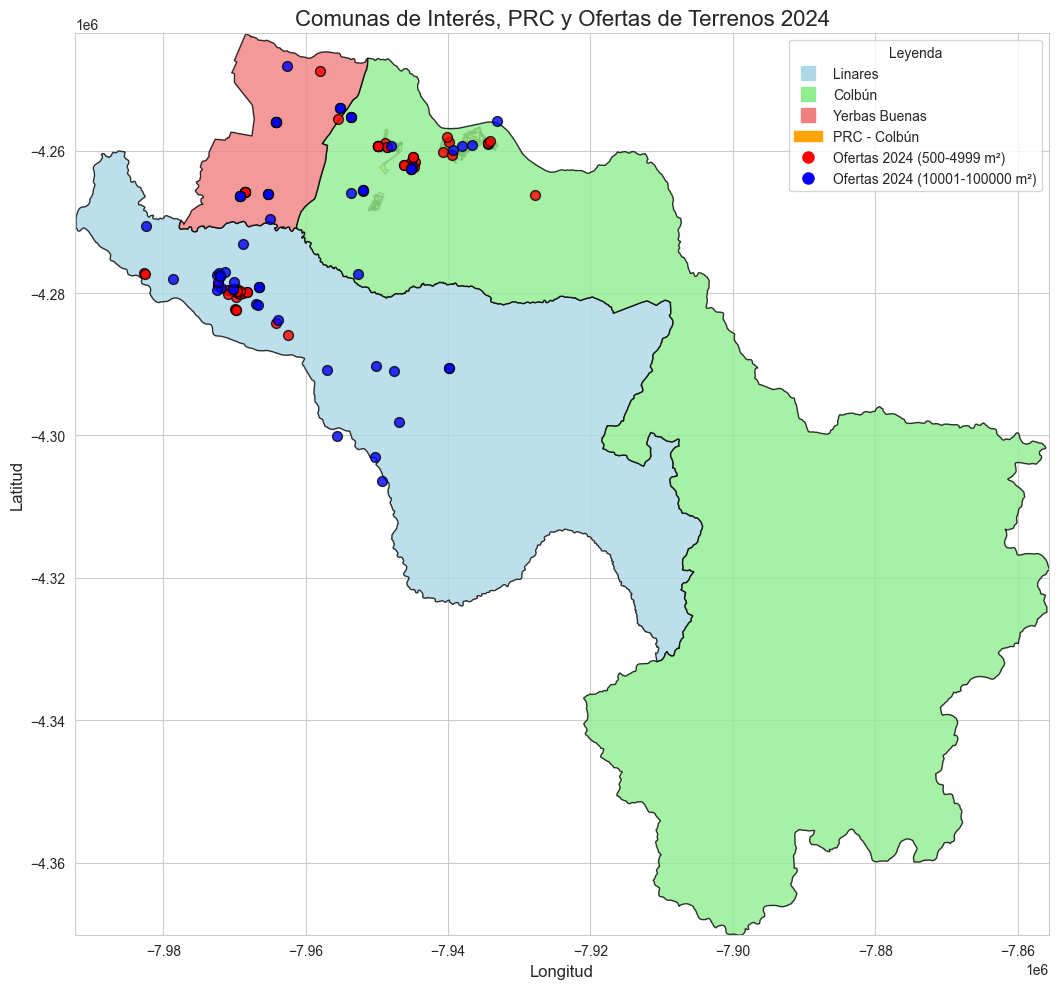

In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer

# Rutas de los shapefiles
shapefile_comunas_path = "Mapas/comunas.shp"
shapefile_prc_path = r"Mapas/IPT_Maule/PRC/IPT_07_PRC_Colbun.shp"

# Leer los shapefiles
gdf_comunas = gpd.read_file(shapefile_comunas_path)
gdf_prc = gpd.read_file(shapefile_prc_path)

# Verificar los CRS y re-proyectar si es necesario
if gdf_prc.crs != gdf_comunas.crs:
    gdf_prc = gdf_prc.to_crs(gdf_comunas.crs)

# Comunas que deseas filtrar
comunas_interes = ['Linares', 'Colbún', 'Yerbas Buenas']

# Filtrar solo las comunas de interés
gdf_filtrado = gdf_comunas[gdf_comunas['Comuna'].isin(comunas_interes)]

# Data de ofertas de terrenos para las comunas seleccionadas
data_prov_linares_2024 = data_2021[
    ((data_2021['comuna_match'] == 'LINARES') | 
     (data_2021['comuna_match'] == 'YERBAS BUENAS') | 
     (data_2021['comuna_match'] == 'COLBUN')) &
    ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2'))
]

# Eliminar ofertas con outliers en longitud y latitud (basado en percentiles)
lat_min, lat_max = data_prov_linares_2024['latitude'].quantile([0.01, 0.99])
lon_min, lon_max = data_prov_linares_2024['longitude'].quantile([0.01, 0.99])
data_prov_linares_2024 = data_prov_linares_2024[
    (data_prov_linares_2024['latitude'] >= lat_min) & 
    (data_prov_linares_2024['latitude'] <= lat_max) &
    (data_prov_linares_2024['longitude'] >= lon_min) & 
    (data_prov_linares_2024['longitude'] <= lon_max)
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
transformer = Transformer.from_crs("EPSG:4326", gdf_comunas.crs, always_xy=True)
data_prov_linares_2024['x'], data_prov_linares_2024['y'] = transformer.transform(
    data_prov_linares_2024['longitude'], data_prov_linares_2024['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_prov_linares_2024[data_prov_linares_2024['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_prov_linares_2024[data_prov_linares_2024['rango_superficie'] == '10001-100000 m2']

# Asignar colores únicos a cada comuna
comuna_colors = {
    'Linares': 'lightblue',
    'Colbún': 'lightgreen',
    'Yerbas Buenas': 'lightcoral'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar el PRC primero para que las demás capas se superpongan
gdf_prc.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5, label='PRC - Colbún')

# Graficar las comunas de interés con colores únicos
for comuna, color in comuna_colors.items():
    gdf_comuna = gdf_filtrado[gdf_filtrado['Comuna'] == comuna]
    gdf_comuna.plot(ax=ax, color=color, edgecolor='black', alpha=0.8, label=comuna)

# Graficar las ofertas de terrenos
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=50
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=50
)

# Añadir títulos y etiquetas
ax.set_title("Comunas de Interés, PRC y Ofertas de Terrenos 2024", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir leyenda personalizada
handles = [
    plt.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=comuna)
    for comuna, color in comuna_colors.items()
]
handles.append(
    mpatches.Patch(color='orange', label='PRC - Colbún')
)
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', fontsize=10, title="Leyenda")

# Ajustar los límites del gráfico
total_bounds = gdf_filtrado.total_bounds
ax.set_xlim(total_bounds[0], total_bounds[2])
ax.set_ylim(total_bounds[1], total_bounds[3])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Casablanca

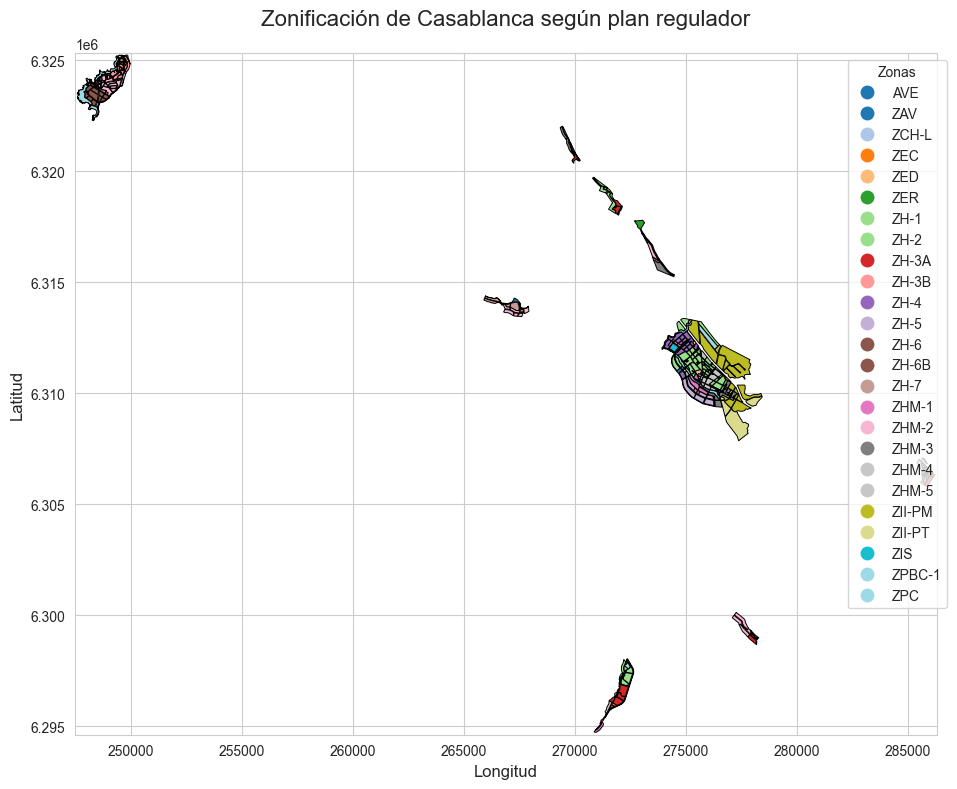

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Cargar el archivo shapefile
shapefile_path = r"Mapas/IPT_Valparaiso/IPT_Valparaiso/PRC/IPT_05_PRC_Casablanca.shp"
gdf = gpd.read_file(shapefile_path)

# Calcular los límites de los polígonos
bounds = gdf.total_bounds  # [minx, miny, maxx, maxy]
x_margin, y_margin = 100, 100  # Ajustar márgenes (más pequeños)

# Crear un esquema de colores personalizado
cmap = ListedColormap(plt.cm.tab20.colors[:len(gdf['ZONA'].unique())])

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))  # Tamaño optimizado
gdf.plot(ax=ax, column='ZONA', cmap=cmap, legend=True, edgecolor='black', linewidth=0.7)

# Ajustar límites para quitar espacios en blanco
ax.set_xlim(bounds[0] - x_margin, bounds[2] + x_margin)
ax.set_ylim(bounds[1] - y_margin, bounds[3] + y_margin)

# Ajustar la leyenda
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.02, 1))  # Colocar la leyenda en la esquina superior derecha
leg.set_title("Zonas")

# Configurar título y etiquetas
ax.set_title("Zonificación de Casablanca según plan regulador", fontsize=16, pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Ajustar márgenes generales
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Reducir área gráfica para leyenda

# Mostrar el gráfico
plt.show()


In [55]:
!pip install brokenaxes

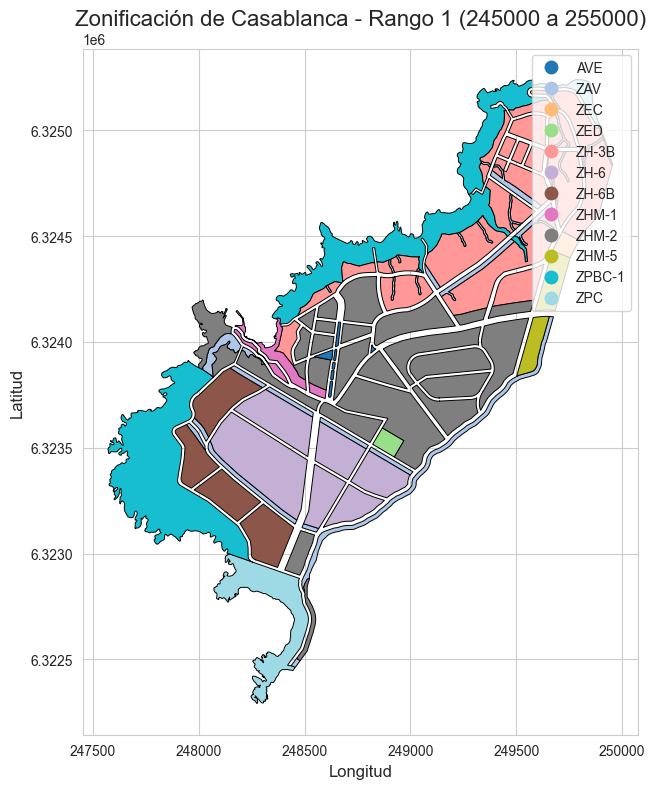

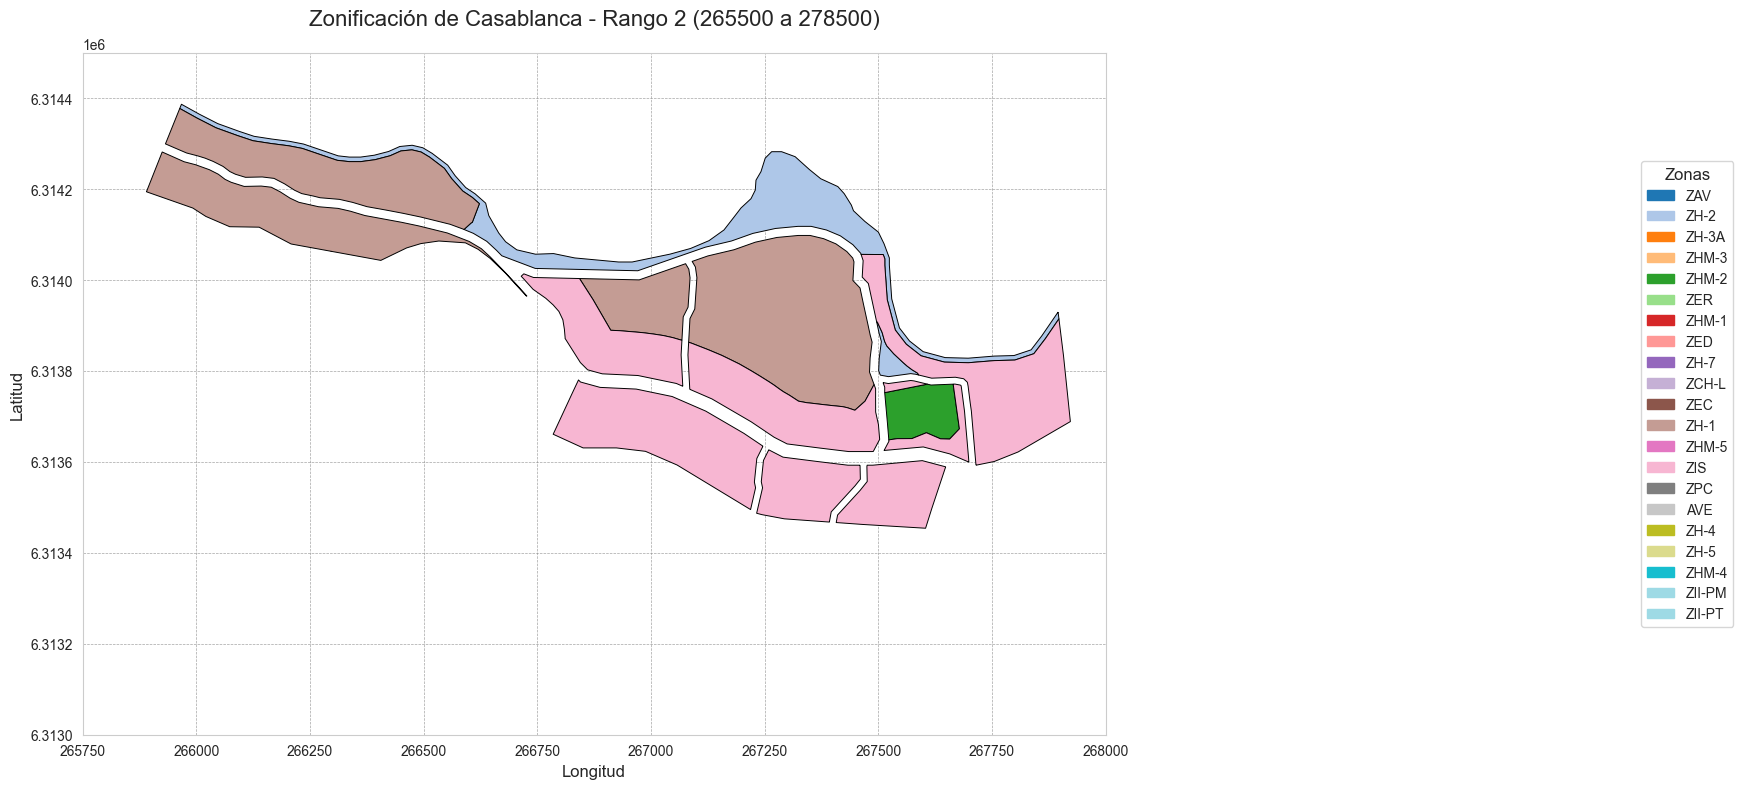

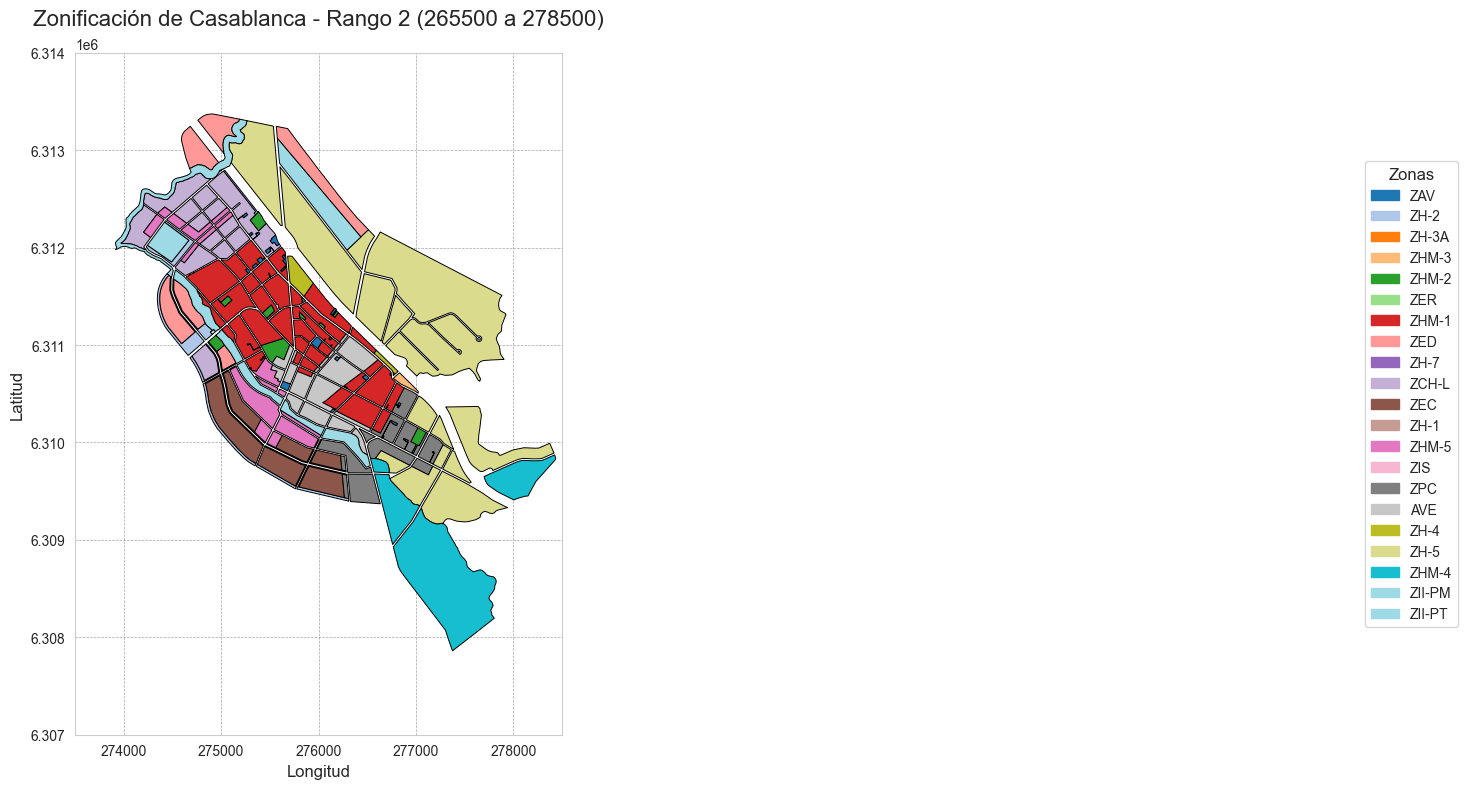

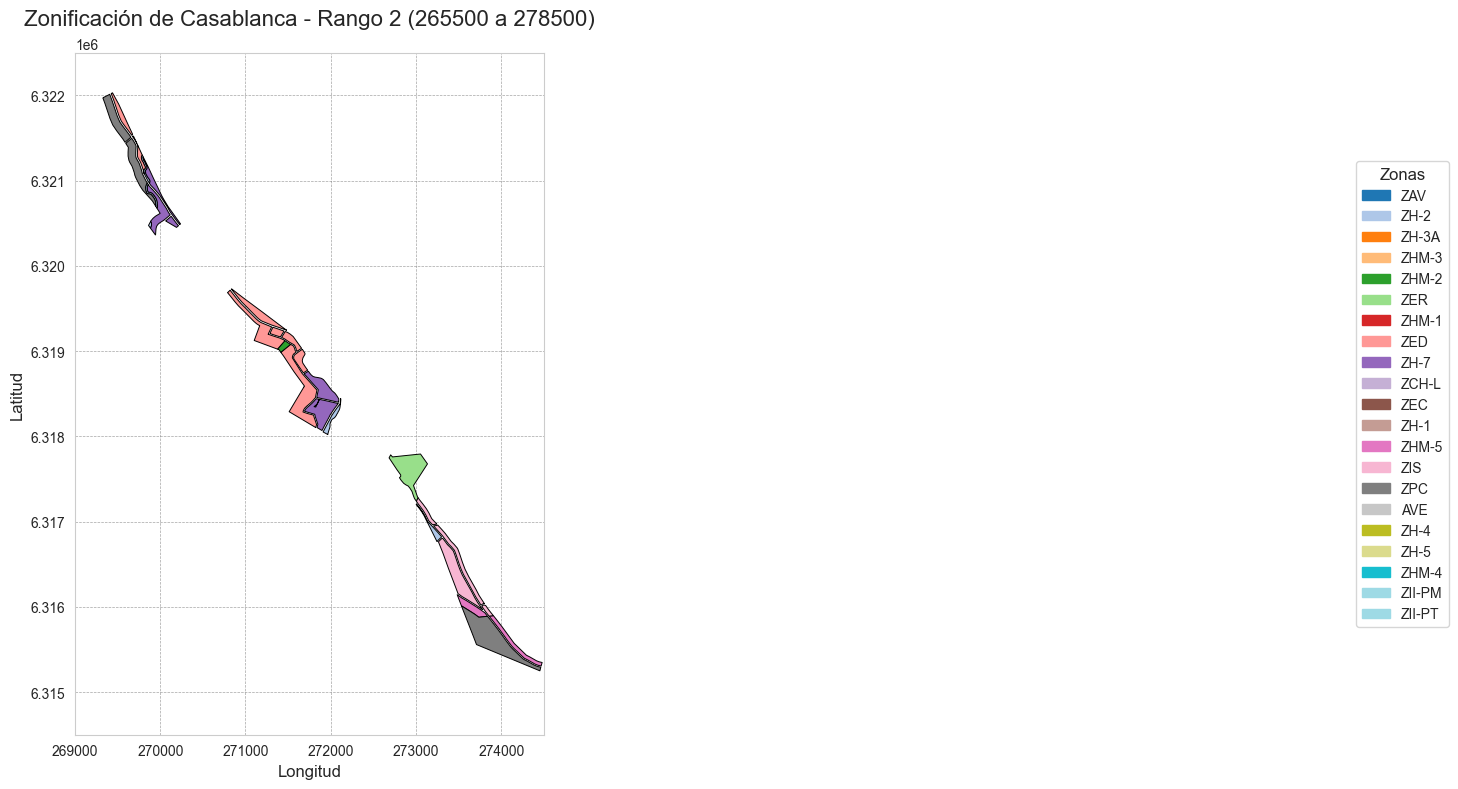

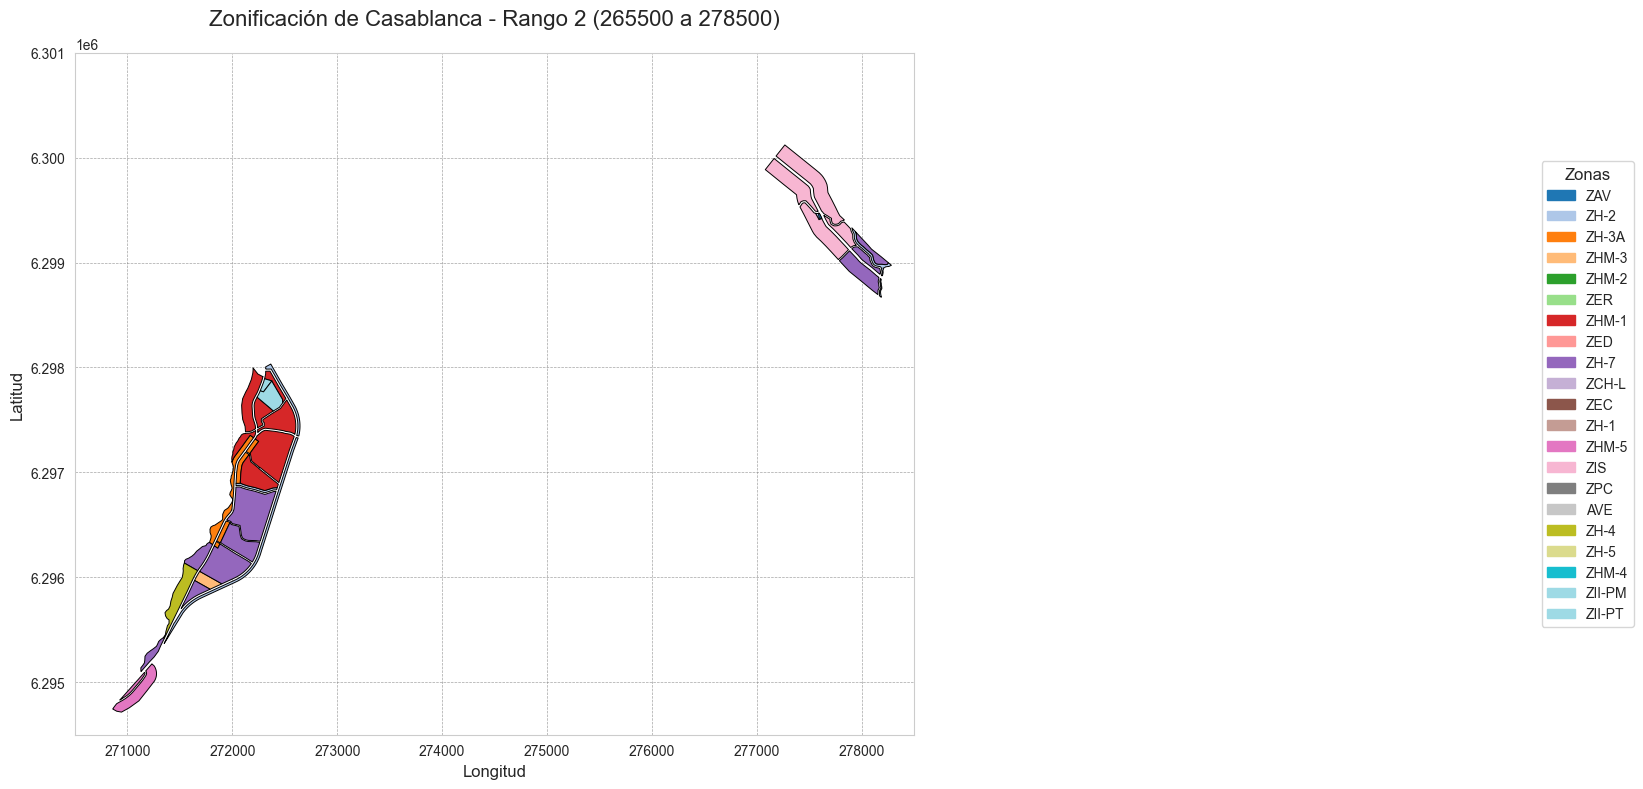

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

# Cargar el archivo shapefile
shapefile_path = r"Mapas/IPT_Valparaiso/IPT_Valparaiso/PRC/IPT_05_PRC_Casablanca.shp"
gdf = gpd.read_file(shapefile_path)

# Crear un esquema de colores personalizado
cmap = ListedColormap(plt.cm.tab20.colors[:len(gdf['ZONA'].unique())])

# Dividir las zonas en dos rangos según el eje X
gdf_rango1 = gdf.cx[245000:255000, :]
gdf_rango2 = gdf.cx[265000:280000, :]

# Crear el primer gráfico (rango 1)
fig, ax = plt.subplots(figsize=(10, 8))
gdf_rango1.plot(ax=ax, column='ZONA', cmap=cmap, legend=True, edgecolor='black', linewidth=0.7)
ax.set_title("Zonificación de Casablanca - Rango 1 (245000 a 255000)", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)
plt.tight_layout()
plt.show()

# Crear el segundo gráfico (rango 2) con ajustes específicos
fig, ax = plt.subplots(figsize=(16, 8))  # Aumentar el tamaño de la figura para más espacio

# Graficar los polígonos
gdf_rango2.plot(ax=ax, column='ZONA', cmap=cmap, legend=False, edgecolor='black', linewidth=0.7)

# Ajustar los límites para centrarse en los polígonos visibles
x_min, x_max = 265750, 268000
y_min, y_max = 6313000, 6314500
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Configurar el título y las etiquetas
ax.set_title("Zonificación de Casablanca - Rango 2 (265500 a 278500)", fontsize=16, pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir una cuadrícula (grid) que abarque todo el gráfico
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Crear la leyenda manualmente
unique_zones = gdf_rango2['ZONA'].unique()
legend_handles = [Patch(color=cmap(i), label=zone) for i, zone in enumerate(unique_zones)]
fig.legend(
    handles=legend_handles,
    title="Zonas",
    loc='center left',  # Posicionar completamente fuera del gráfico
    bbox_to_anchor=(1.05, 0.5),  # Mover más hacia la derecha
    fontsize=10,
    title_fontsize=12
)

# Ajustar márgenes y diseño
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Reducir márgenes para ocupar más área del gráfico
plt.show()

# Crear el segundo gráfico (rango 3) con ajustes específicos
fig, ax = plt.subplots(figsize=(16, 8))  # Aumentar el tamaño de la figura para más espacio

# Graficar los polígonos
gdf_rango2.plot(ax=ax, column='ZONA', cmap=cmap, legend=False, edgecolor='black', linewidth=0.7)

# Ajustar los límites para centrarse en los polígonos visibles
x_min, x_max = 273500, 278500
y_min, y_max = 6307000, 6314000
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Configurar el título y las etiquetas
ax.set_title("Zonificación de Casablanca - Rango 2 (265500 a 278500)", fontsize=16, pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir una cuadrícula (grid) que abarque todo el gráfico
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Crear la leyenda manualmente
unique_zones = gdf_rango2['ZONA'].unique()
legend_handles = [Patch(color=cmap(i), label=zone) for i, zone in enumerate(unique_zones)]
fig.legend(
    handles=legend_handles,
    title="Zonas",
    loc='center left',  # Posicionar completamente fuera del gráfico
    bbox_to_anchor=(1.05, 0.5),  # Mover más hacia la derecha
    fontsize=10,
    title_fontsize=12
)

# Ajustar márgenes y diseño
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Reducir márgenes para ocupar más área del gráfico
plt.show()



# Crear el segundo gráfico (rango 4) con ajustes específicos
fig, ax = plt.subplots(figsize=(16, 8))  # Aumentar el tamaño de la figura para más espacio

# Graficar los polígonos
gdf_rango2.plot(ax=ax, column='ZONA', cmap=cmap, legend=False, edgecolor='black', linewidth=0.7)

# Ajustar los límites para centrarse en los polígonos visibles
x_min, x_max = 269000, 274500
y_min, y_max = 6314500, 6322500
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Configurar el título y las etiquetas
ax.set_title("Zonificación de Casablanca - Rango 2 (265500 a 278500)", fontsize=16, pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir una cuadrícula (grid) que abarque todo el gráfico
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Crear la leyenda manualmente
unique_zones = gdf_rango2['ZONA'].unique()
legend_handles = [Patch(color=cmap(i), label=zone) for i, zone in enumerate(unique_zones)]
fig.legend(
    handles=legend_handles,
    title="Zonas",
    loc='center left',  # Posicionar completamente fuera del gráfico
    bbox_to_anchor=(1.05, 0.5),  # Mover más hacia la derecha
    fontsize=10,
    title_fontsize=12
)

# Ajustar márgenes y diseño
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Reducir márgenes para ocupar más área del gráfico
plt.show()



# Crear el segundo gráfico (rango 4) con ajustes específicos
fig, ax = plt.subplots(figsize=(16, 8))  # Aumentar el tamaño de la figura para más espacio

# Graficar los polígonos
gdf_rango2.plot(ax=ax, column='ZONA', cmap=cmap, legend=False, edgecolor='black', linewidth=0.7)

# Ajustar los límites para centrarse en los polígonos visibles
x_min, x_max = 270500, 278500
y_min, y_max = 6294500, 6301000
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Configurar el título y las etiquetas
ax.set_title("Zonificación de Casablanca - Rango 2 (265500 a 278500)", fontsize=16, pad=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir una cuadrícula (grid) que abarque todo el gráfico
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Crear la leyenda manualmente
unique_zones = gdf_rango2['ZONA'].unique()
legend_handles = [Patch(color=cmap(i), label=zone) for i, zone in enumerate(unique_zones)]
fig.legend(
    handles=legend_handles,
    title="Zonas",
    loc='center left',  # Posicionar completamente fuera del gráfico
    bbox_to_anchor=(1.05, 0.5),  # Mover más hacia la derecha
    fontsize=10,
    title_fontsize=12
)

# Ajustar márgenes y diseño
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Reducir márgenes para ocupar más área del gráfico
plt.show()

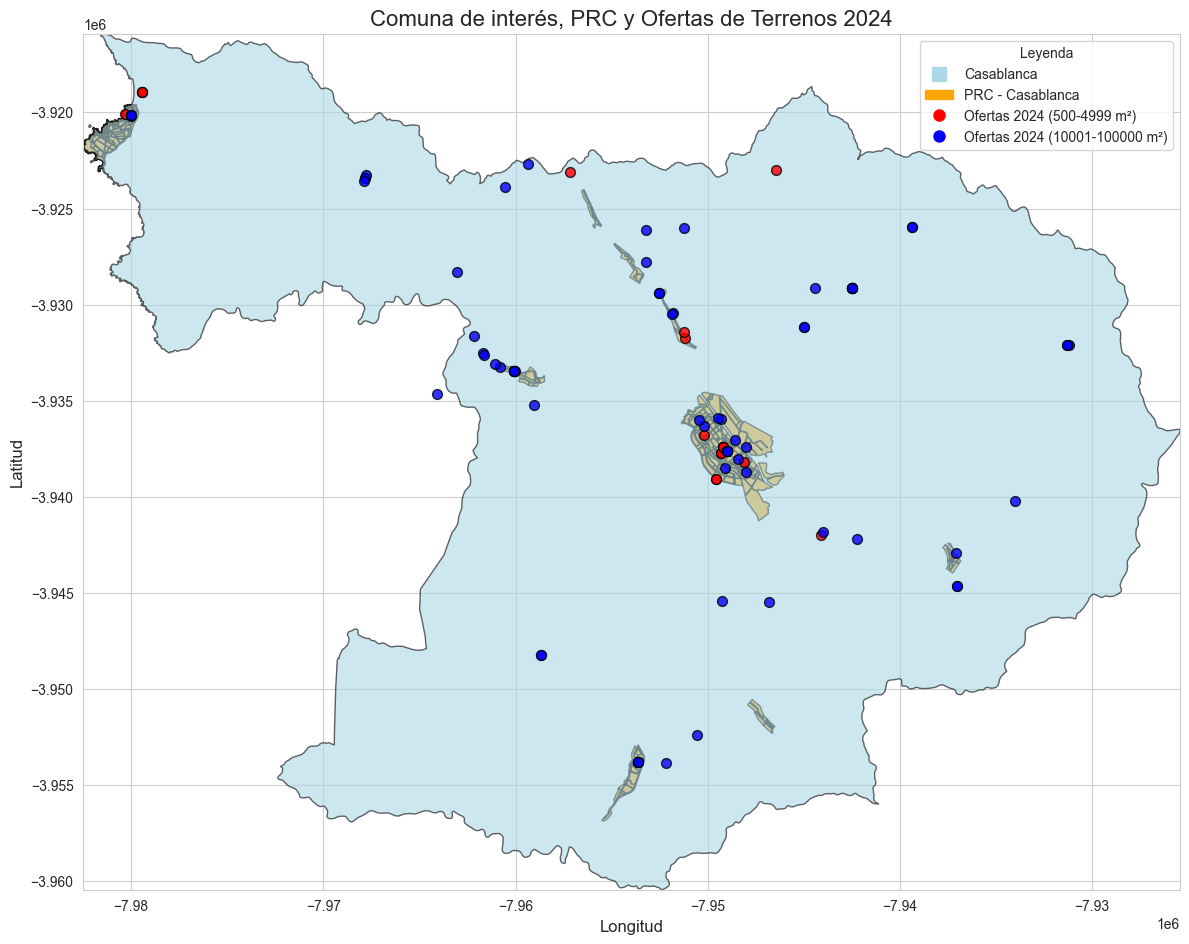

In [91]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Transformer

# Rutas de los shapefiles
shapefile_comunas_path = "Mapas/comunas.shp"
shapefile_prc_path = r"Mapas/IPT_Valparaiso/IPT_Valparaiso/PRC/IPT_05_PRC_Casablanca.shp"

# Leer los shapefiles
gdf_comunas = gpd.read_file(shapefile_comunas_path)
gdf_prc = gpd.read_file(shapefile_prc_path)

# Verificar los CRS y re-proyectar si es necesario
if gdf_prc.crs != gdf_comunas.crs:
    gdf_prc = gdf_prc.to_crs(gdf_comunas.crs)

# Comunas que deseas filtrar
comunas_interes = ['Casablanca']

# Filtrar solo las comunas de interés
gdf_filtrado = gdf_comunas[gdf_comunas['Comuna'].isin(comunas_interes)]

# Data de ofertas de terrenos para las comunas seleccionadas
data_casablanca_2024 = data_2021[
    ((data_2021['comuna_match'] == 'CASABLANCA')
       &
    ((data_2021['semestre'] == '2024S1') | (data_2021['semestre'] == '2024S2')))
]

# Eliminar ofertas con outliers en longitud y latitud (basado en percentiles)
lat_min, lat_max = data_casablanca_2024['latitude'].quantile([0.01, 0.99])
lon_min, lon_max = data_casablanca_2024['longitude'].quantile([0.01, 0.99])
data_casablanca_2024 = data_casablanca_2024[
    (data_casablanca_2024['latitude'] >= lat_min) & 
    (data_casablanca_2024['latitude'] <= lat_max) &
    (data_casablanca_2024['longitude'] >= lon_min) & 
    (data_casablanca_2024['longitude'] <= lon_max)
]

# Convertir CRS de las ofertas al mismo CRS del shapefile
transformer = Transformer.from_crs("EPSG:4326", gdf_comunas.crs, always_xy=True)
data_casablanca_2024['x'], data_casablanca_2024['y'] = transformer.transform(
    data_casablanca_2024['longitude'], data_casablanca_2024['latitude']
)

# Filtrar ofertas por rango de superficie
ofertas_500_4999 = data_casablanca_2024[data_casablanca_2024['rango_superficie'] == '500-4999 m2']
ofertas_10001_100000 = data_casablanca_2024[data_casablanca_2024['rango_superficie'] == '10001-100000 m2']

# Asignar colores únicos a cada comuna
comuna_colors = {
    'Casablanca': 'lightblue'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar el PRC primero para que las demás capas se superpongan
gdf_prc.plot(ax=ax, color='orange', edgecolor='black', alpha=0.8, label='PRC - Colbún')

# Graficar las comunas de interés con colores únicos
for comuna, color in comuna_colors.items():
    gdf_comuna = gdf_filtrado[gdf_filtrado['Comuna'] == comuna]
    gdf_comuna.plot(ax=ax, color=color, edgecolor='black', alpha=0.6, label=comuna)

# Graficar las ofertas de terrenos
ax.scatter(
    ofertas_500_4999['x'], ofertas_500_4999['y'],
    color='red', label='Ofertas 2024 (500-4999 m²)', alpha=0.8, edgecolor='black', s=50
)
ax.scatter(
    ofertas_10001_100000['x'], ofertas_10001_100000['y'],
    color='blue', label='Ofertas 2024 (10001-100000 m²)', alpha=0.8, edgecolor='black', s=50
)

# Añadir títulos y etiquetas
ax.set_title("Comuna de interés, PRC y Ofertas de Terrenos 2024", fontsize=16)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Añadir leyenda personalizada
handles = [
    plt.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=comuna)
    for comuna, color in comuna_colors.items()
]
handles.append(
    mpatches.Patch(color='orange', label='PRC - Casablanca')
)
handles.extend([
    plt.Line2D([], [], color='red', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (500-4999 m²)'),
    plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=8, label='Ofertas 2024 (10001-100000 m²)')
])
ax.legend(handles=handles, loc='upper right', fontsize=10, title="Leyenda")

# Ajustar los límites del gráfico
total_bounds = gdf_filtrado.total_bounds
ax.set_xlim(total_bounds[0], total_bounds[2])
ax.set_ylim(total_bounds[1], total_bounds[3])

# Mostrar el gráfico
plt.tight_layout()
plt.show()
